In [229]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

Importar librerías

In [230]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [231]:
# Establecer apariencia general de los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [232]:
#Cargar los datos
#Utilizando el paquete palmerpenguins
#Datos crudos

raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df # importando el dataset de pinguinos estos datso estan en crudo 

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

In [233]:
#Datos previamente procesados
preprocess_penguins_df = palmerpenguins.load_penguins() #importando el dataset de pinguinos aca los datos ya estan limpios 
preprocess_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [234]:
#Utilizando los conjuntos de datos de seaborn
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [235]:

preprocess_penguins_df.dtypes



species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [236]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [237]:
(
    preprocess_penguins_df
   .dtypes
   .value_counts()
)
#imprimirndo solo los valores numericos 

float64    4
object     3
int64      1
dtype: int64

In [238]:
preprocess_penguins_df.shape #nos indica la cantidad de variables que tenemos 

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [239]:
(
    preprocess_penguins_df
    .isnull()
    
)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      False   False           False          False              False   
1      False   False           False          False              False   
2      False   False           False          False              False   
3      False   False            True           True               True   
4      False   False           False          False              False   
..       ...     ...             ...            ...                ...   
339    False   False           False          False              False   
340    False   False           False          False              False   
341    False   False           False          False              False   
342    False   False           False          False              False   
343    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 8 columns]

In [240]:
(
   preprocess_penguins_df
    .isnull()
    .any() #nos muetra los valores nulos de una manera mas resumida 
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable

In [241]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

In [242]:
(
    preprocess_penguins_df
    .isnull()
    .any() # nos muetra los valores nulos de una manera mas resumida 
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [243]:
(
    preprocess_penguins_df
    .isnull()
    .sum() 
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [244]:
(
  preprocess_penguins_df
  .isnull()
  .melt()
)

variable  value
0     species  False
1     species  False
2     species  False
3     species  False
4     species  False
...       ...    ...
2747     year  False
2748     year  False
2749     year  False
2750     year  False
2751     year  False

[2752 rows x 2 columns]

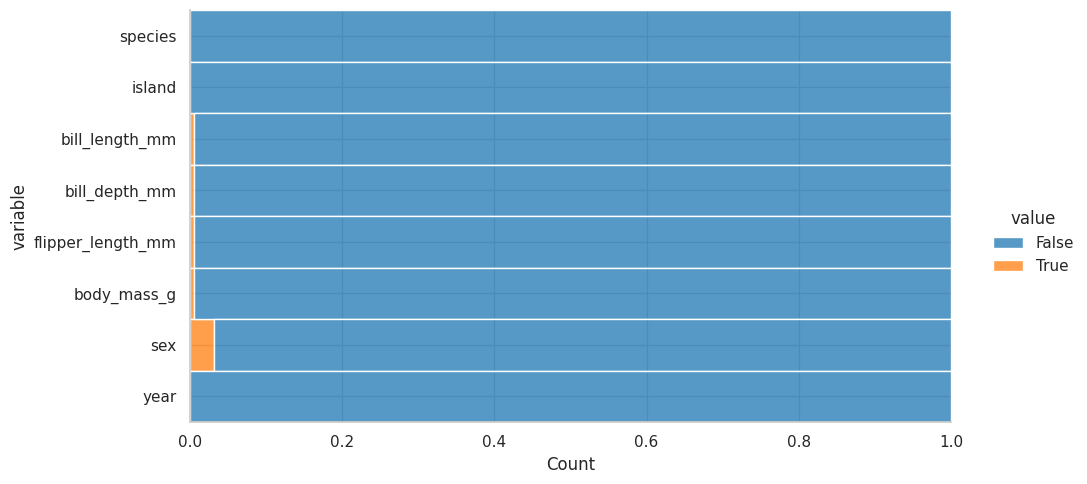

In [245]:

(
   preprocess_penguins_df
  .isnull()
  .melt()
  .pipe(
      lambda df: (
          sns.displot(
              data=df,
              y = 'variable',
              hue= 'value',
              multiple= 'fill',
              aspect=2
          )
      )
  )
)

preprocess_penguins_df, ayudando a identificar las áreas donde faltan datos. El eje x del mapa de calor corresponde a las columnas del DataFrame,True) o sin nulo ( False).

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

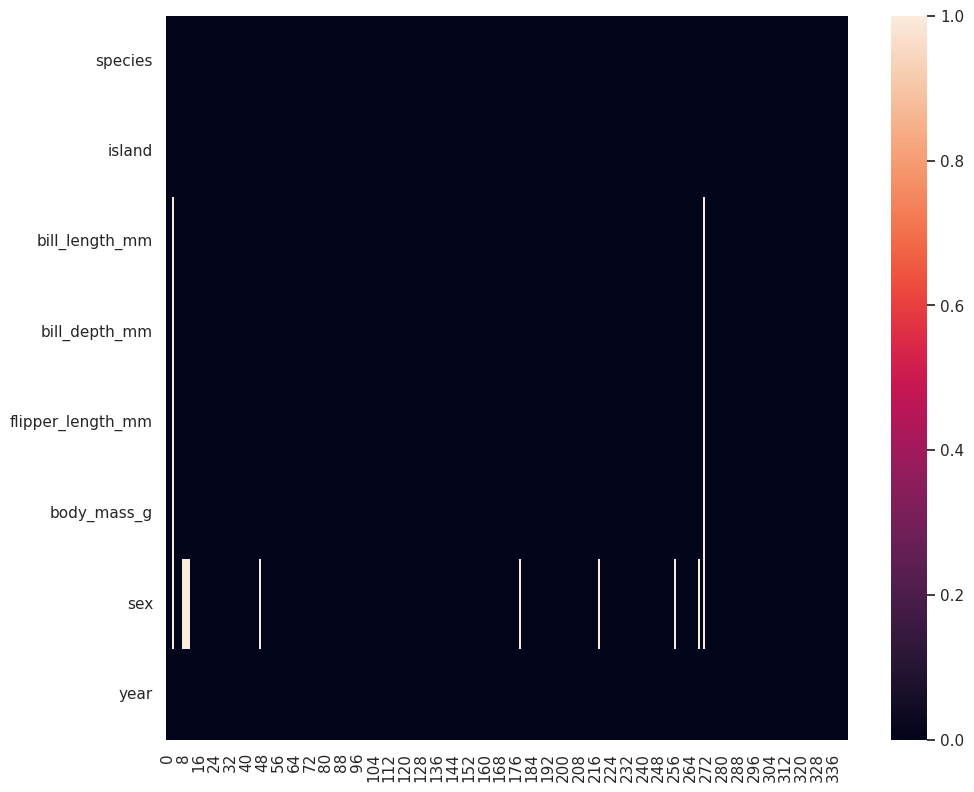

In [246]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [247]:
preprocess_penguins_df.shape


(344, 8)

In [248]:
(
    preprocess_penguins_df
    .dropna() #como podemos visualizar con drona al eliminar los datos estoy 
    #perdiendo 10 filas 
)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

In [249]:
preprossed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
#aca ya tenemos nuetros datos procesados y limpios 
preprossed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

In [250]:
preprossed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

In [251]:
preprossed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [252]:
preprossed_penguins_df.describe(include=[np.number])
#sacando solo las variables numericamente 

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [253]:
preprossed_penguins_df.describe(include=object)
#imprimiendo solo las variebles categoricas

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [254]:
(
    preprossed_penguins_df
    .astype({
        'species' : 'category',
        'island' : 'category',
        'sex'    : 'category'
    })
    
)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

## ¿Cómo visualizar los conteos?
### Pandas

<AxesSubplot: >

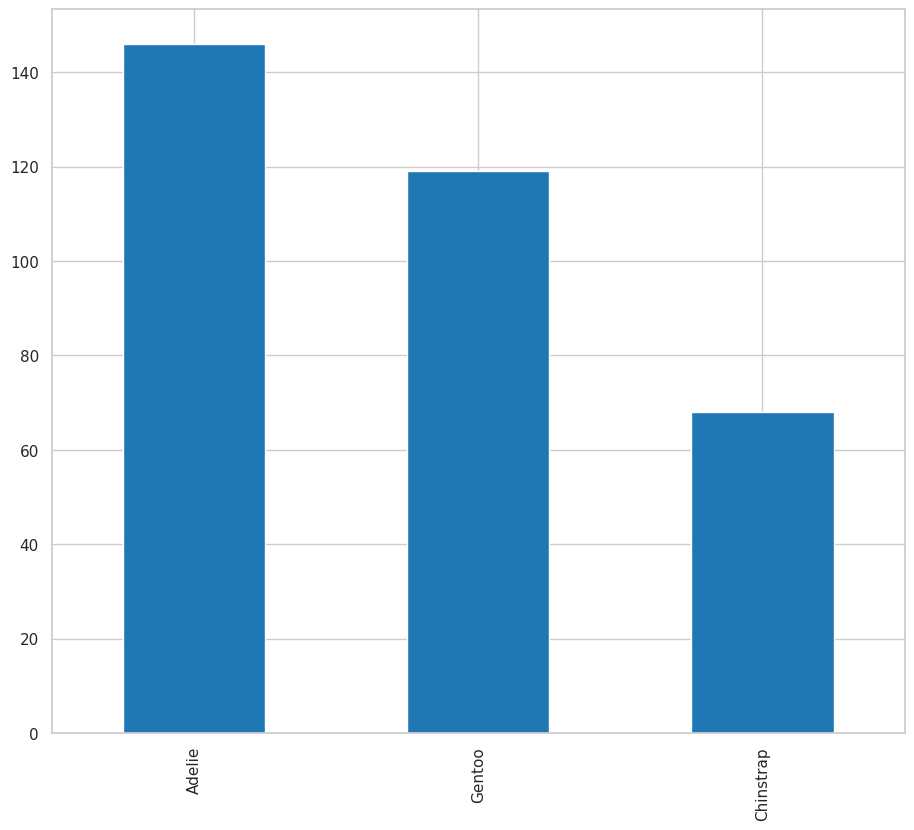

In [255]:
(
    preprossed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )

)

### Seaborn

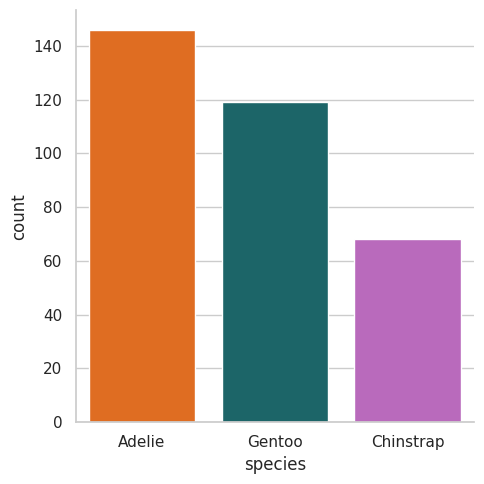

In [256]:
#graficando nuetras variables con searborn
sns.catplot(
    data = preprossed_penguins_df,
    x = 'species', 
    kind = 'count',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

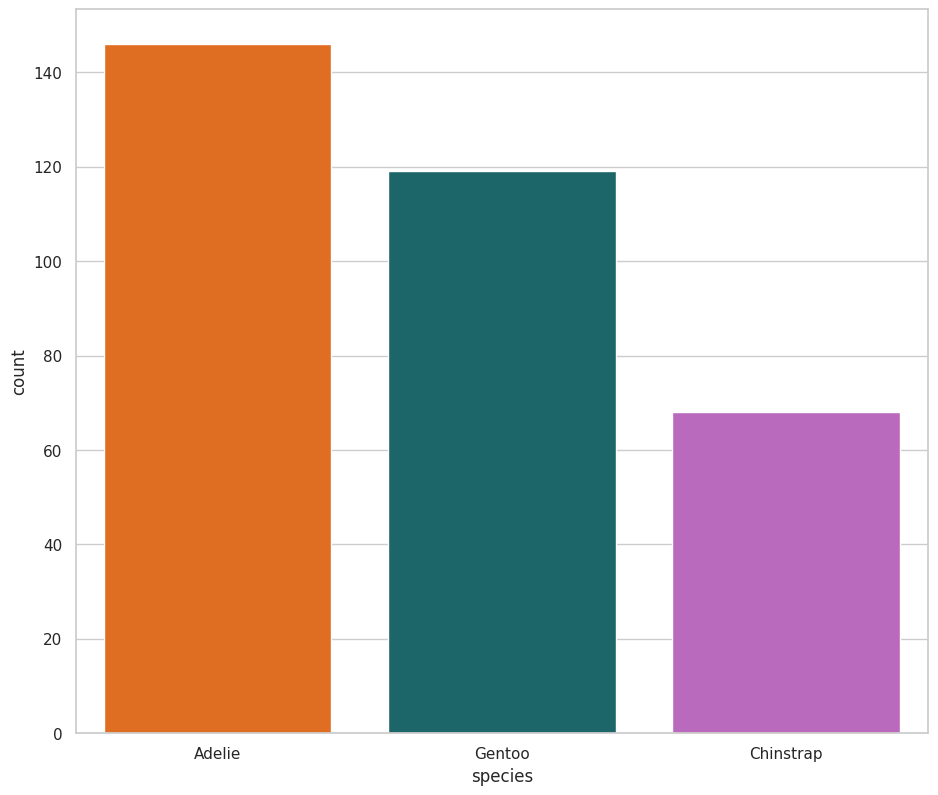

In [257]:
(
    preprossed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df:(
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )   
        )
    )
)

### ¿Cómo visualizar las proporciones?

In [258]:
(
    preprossed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

In [259]:
(
    preprossed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='island',
                multiple='fill',
                #palette=penguin_color
            )
        )
    )
)

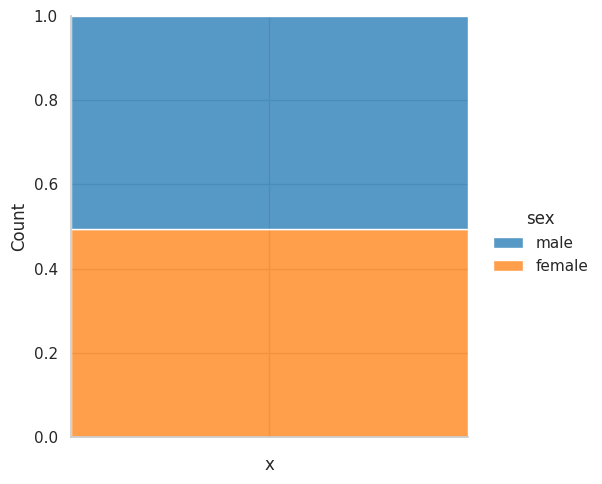

In [260]:
(
    preprossed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='sex',
                multiple='fill',
                #palette=penguin_color
            )
        )
    )
)

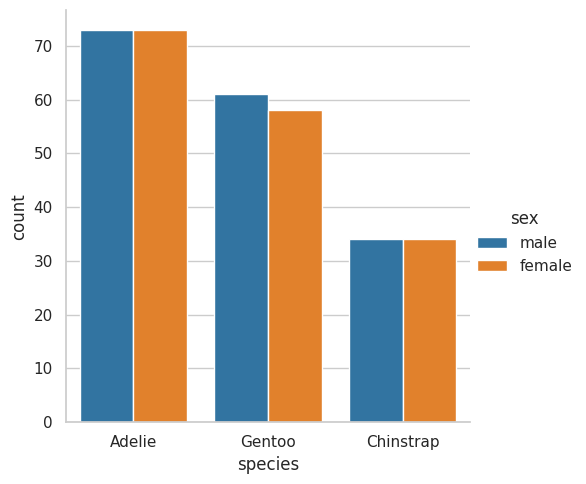

In [261]:

sns.catplot(
    data=preprossed_penguins_df,
    x='species',
    kind='count',
      
    hue='sex'
    

    )
plt.show()

<AxesSubplot: >

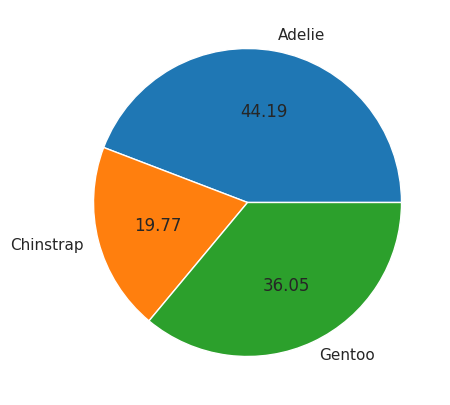

In [262]:
preprocess_penguins_df.groupby('species').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

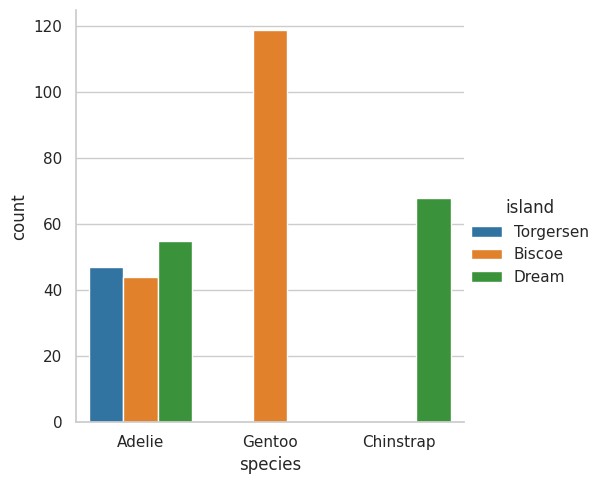

In [263]:
sns.catplot(
    data=preprossed_penguins_df,
    x='species',
    kind='count',
        #categorizamos por isla
    hue='island'
    

    )

crea un gráfico de distribución (histograma) con datos del DataFrame preprocessed_penguins_df. La columna 'x' es agregada con valores vacíos para permitir la visualización de la distribución vacía en el gráfico. Luego, se muestra la distribución de 'x' para cada categoría de 'sex', utilizando diferentes colores para cada una. Esto puede ayudar a visualizar cómo se distribuye 'x' en función del género de los pingüinos.

# Medidas de tendencia central

## Media o promedio

In [264]:
preprossed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [265]:
np.mean(preprossed_penguins_df.bill_depth_mm)
#aca estamos aplicando la media o promedio a una sola variable 

17.164864864864867

In [266]:
preprossed_penguins_df.mean()
#aplicando el promedio a todas las variables 

/tmp/ipykernel_559/1268459053.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [267]:
preprossed_penguins_df.median()
#aplicando la medianaa todas las variables 

/tmp/ipykernel_559/375788672.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [268]:
preprossed_penguins_df.mode()
#imprimiendo el dato que mas se repite dentro de nuestro conjunto de datos

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [269]:
preprossed_penguins_df.describe(include=object)
#describiendo los objectos de las variables 

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [270]:
preprossed_penguins_df.max()
#aca estamos imprimiendo nuetras variables con su valor maximo

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       male
year                      2009
dtype: object

In [271]:
preprossed_penguins_df.max(numeric_only=True)
#aca estamos imprimiendo el maximo de las variables pero solo las variables nuemricas 

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [272]:
preprocess_penguins_df.min(numeric_only=True)
#aca estamos imprimirndo el minimo  solo las variables numericas 

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [273]:
preprossed_penguins_df.max(numeric_only=True) - preprossed_penguins_df.min(numeric_only=True)
#nos muestra la diferencias de rango que esisten entre el valor maximo y minimo de cada variable numerica 

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [274]:
preprossed_penguins_df.std()
#aca nos esta mostrando la desviación estandar de cada una de las variables 

/tmp/ipykernel_559/471748712.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [275]:
preprocess_penguins_df.mean()
#Imprimiendo la media de las variables numericas  

/tmp/ipykernel_559/1608967727.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [276]:
preprossed_penguins_df.mean() + preprossed_penguins_df.std()
#nos mostrara el tope maximo de cada ina de las varables 

/tmp/ipykernel_559/3739837130.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.mean() + preprossed_penguins_df.std()
/tmp/ipykernel_559/3739837130.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.mean() + preprossed_penguins_df.std()


bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [277]:
preprossed_penguins_df.mean() - preprossed_penguins_df.std()
#aca nos imprimira el tope minimo de las variables 

/tmp/ipykernel_559/1259912923.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.mean() - preprossed_penguins_df.std()
/tmp/ipykernel_559/1259912923.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.mean() - preprossed_penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

In [278]:
x = preprocess_penguins_df
y = preprossed_penguins_df


In [279]:
x
y

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

## ¿Cuál es el rango intercuartílico?

In [280]:
#los rangos intercartiles son muchos mas robustos nos dan mas información porque se basan en percentiles 
#que consiste en dividir nuestros datos en partes iguales 
preprossed_penguins_df.quantile()
#imprimiendo la media de las variables 

/tmp/ipykernel_559/364466369.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.quantile()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
Name: 0.5, dtype: float64

In [281]:
preprossed_penguins_df.quantile(0.75)
#imprimiendo el 75% de nuetras variables 

/tmp/ipykernel_559/4150381048.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [282]:
preprossed_penguins_df.quantile(0.25)

/tmp/ipykernel_559/3019110948.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [283]:
preprossed_penguins_df.quantile(0.75) - preprossed_penguins_df.quantile(0.25)
#generando el rango intercuartilico, donde capturamos el 50% de nuetros datso al rededor 
#de la media, pero aca podemo perder algo de información 

/tmp/ipykernel_559/73868959.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df.quantile(0.75) - preprossed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [284]:
(
    preprossed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('bariable')
    .reset_index()
    .assign(
        iqr= lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_559/447847337.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprossed_penguins_df


bariable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

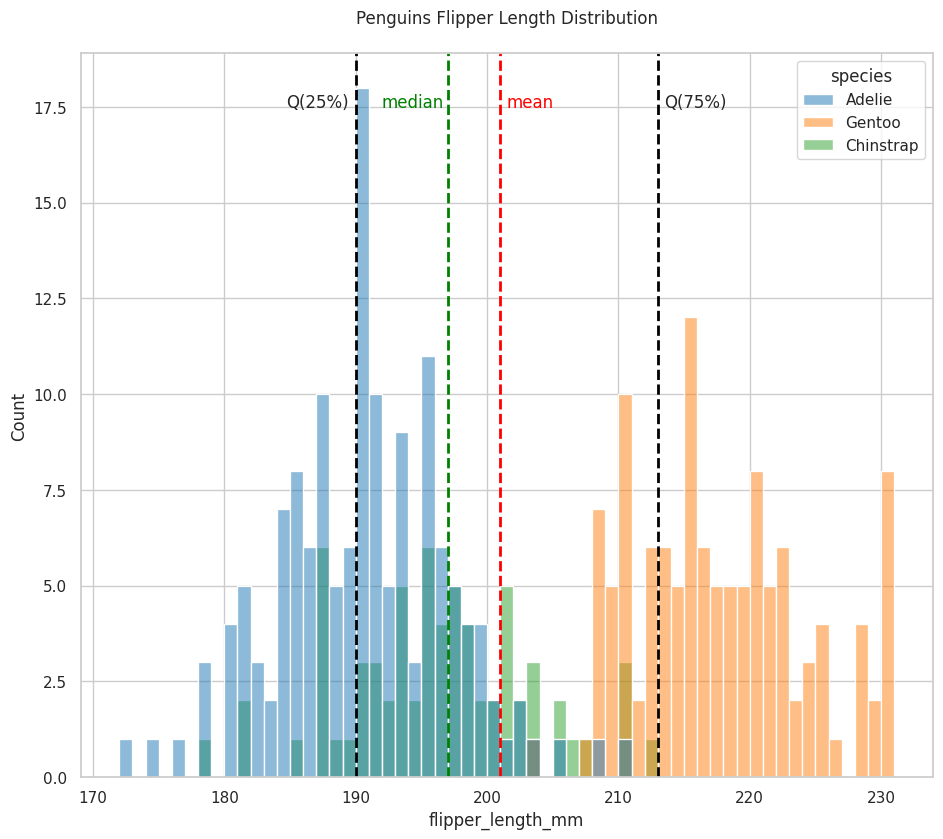

In [285]:
var_flipper_len = preprossed_penguins_df['flipper_length_mm']

g=sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    hue='species',
    alpha=.5
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

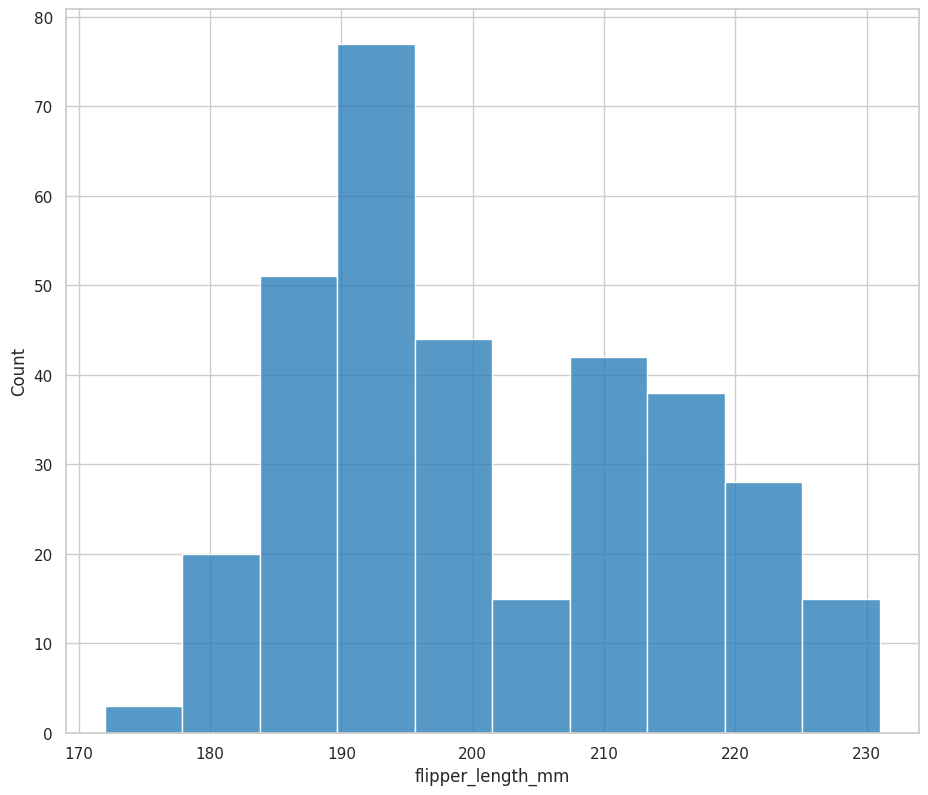

In [286]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm'
)
#aca estamos generendo interbalos para calcular la frecuencia 

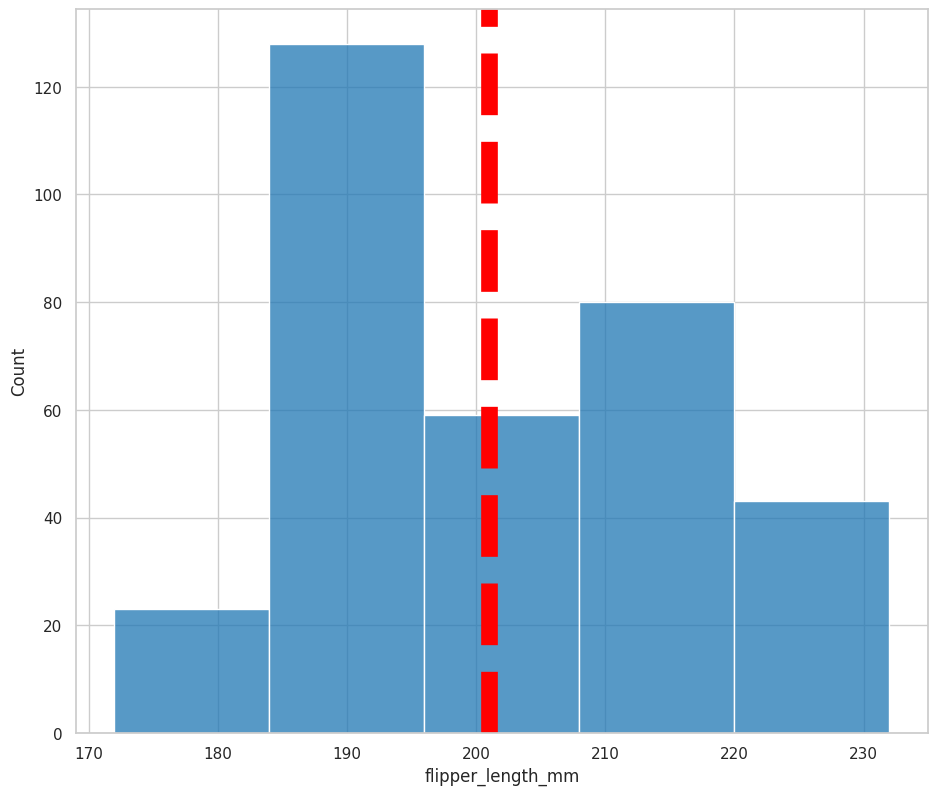

In [287]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=12
)

plt.axvline(
    x=preprossed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=12
)
#aca estamos dividiendo nuetro grafica, que seria el promedio de la variable 
#los histogramas no son del todo confiables, nos pueden dar informacion sesgada o engañosa 

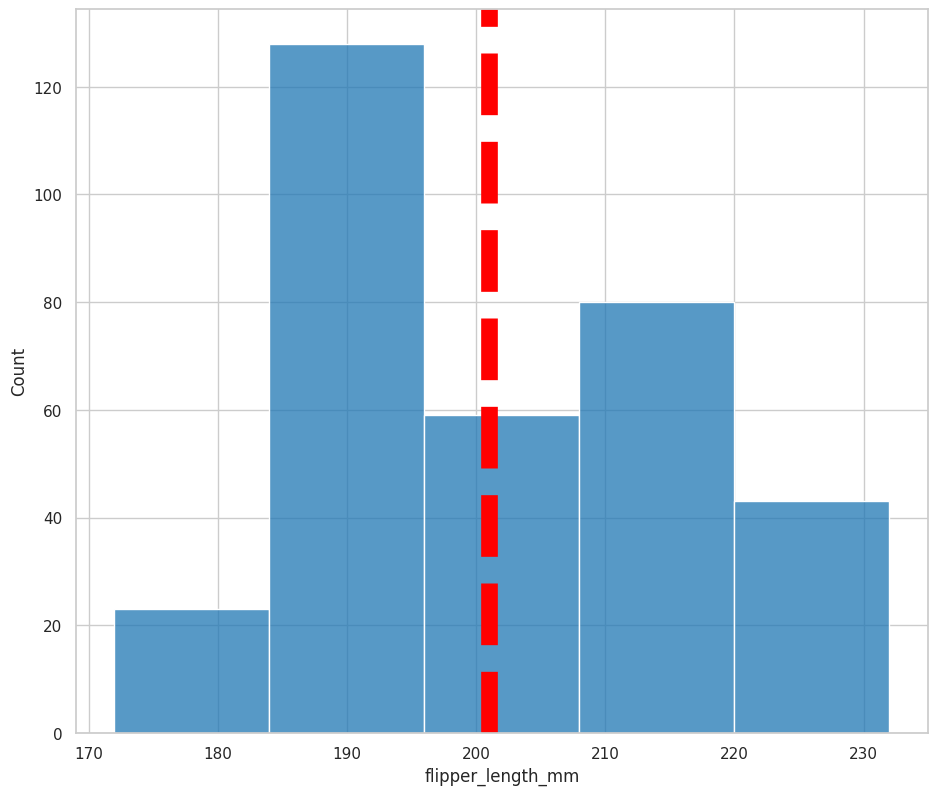

In [288]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=12
)

plt.axvline(
    x=preprossed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=12
)
#aca estamos dividiendo nuetro grafica, que seria el promedio de la variable 

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

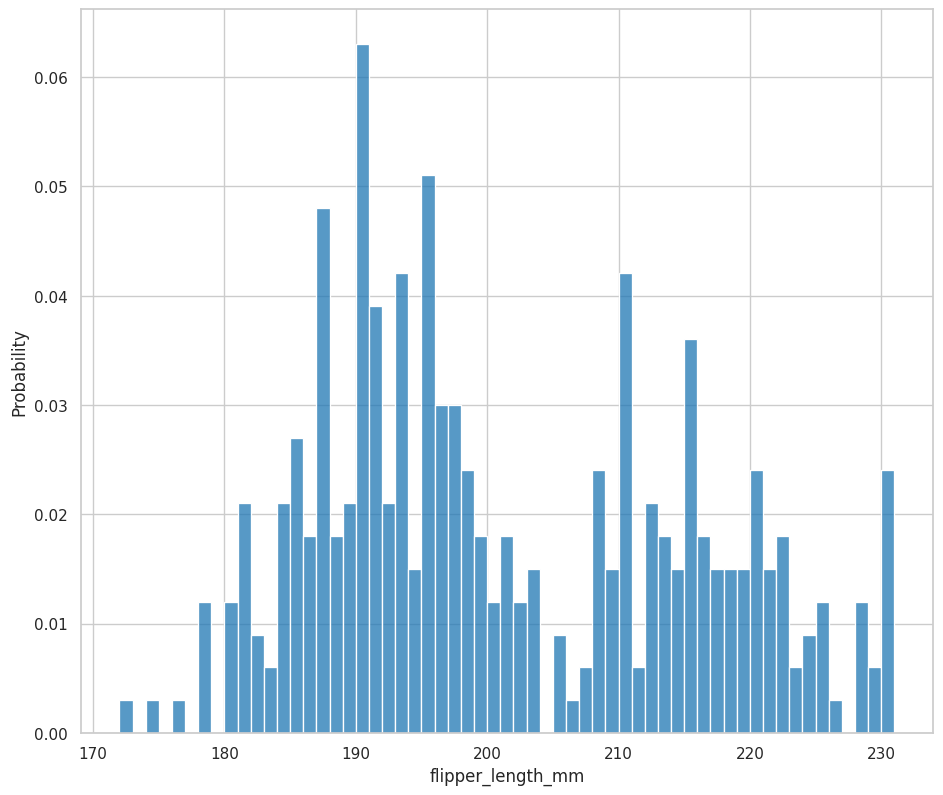

In [289]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)
#aca la barras del histograma nos reprecenta la probabilida 

### Diagrama de caja / boxplot

In [290]:
sns.boxplot(
    data=preprossed_penguins_df,
    x= 'flipper_length_mm'
)
#generando un diagrama de cajapara visuslizar el rango de nuetra bariable 
#como podemos los datso estan sesgados hacia un lado  

<AxesSubplot: xlabel='flipper_length_mm'>

In [291]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=3
)

plt.axvline(
    x=preprossed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=12
)

### Limitaciones

In [292]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

# Distribuciones: PMFs, CDFs y PDFs


### Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

In [293]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=1

)
#intervalos para calcular la frecuencia 
#visualizando de una forma mas profunda el histograma, como podemos apreciar aca miramos algunos datos basios 
#y muchos otros datos 

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

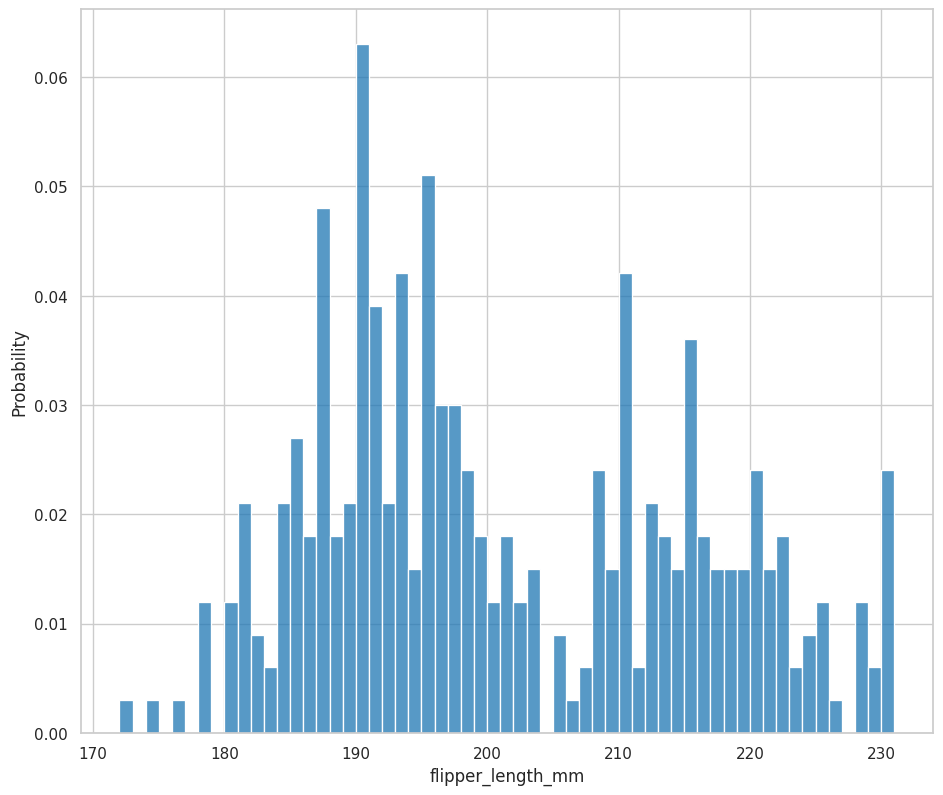

In [294]:
sns.histplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)
#aca la barras del histograma nos reprecenta la probabilida 

In [295]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    preprossed_penguins_df.flipper_length_mm,normalize=True
)
#aca nos esta mostrando la provlidada de una forma muy simple 

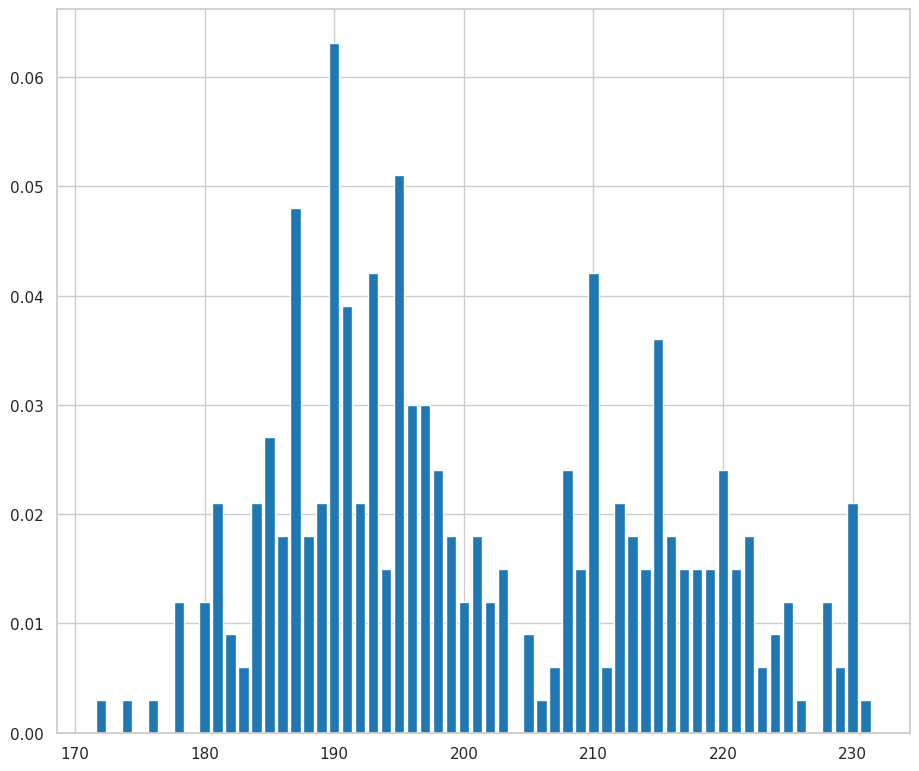

In [296]:
pmf_flipper_length_mm.bar()
#analisando las probabilidaddes por cada variable discreta que tengams 

In [297]:
pmf_flipper_length_mm(190)
#con empiricadis puedo encontrar probabilidades 
#de una variable en espesificco 
#esta libreria nos da una esploracion mucho mas sencilla 

0.06306306306306306

In [298]:
preprossed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

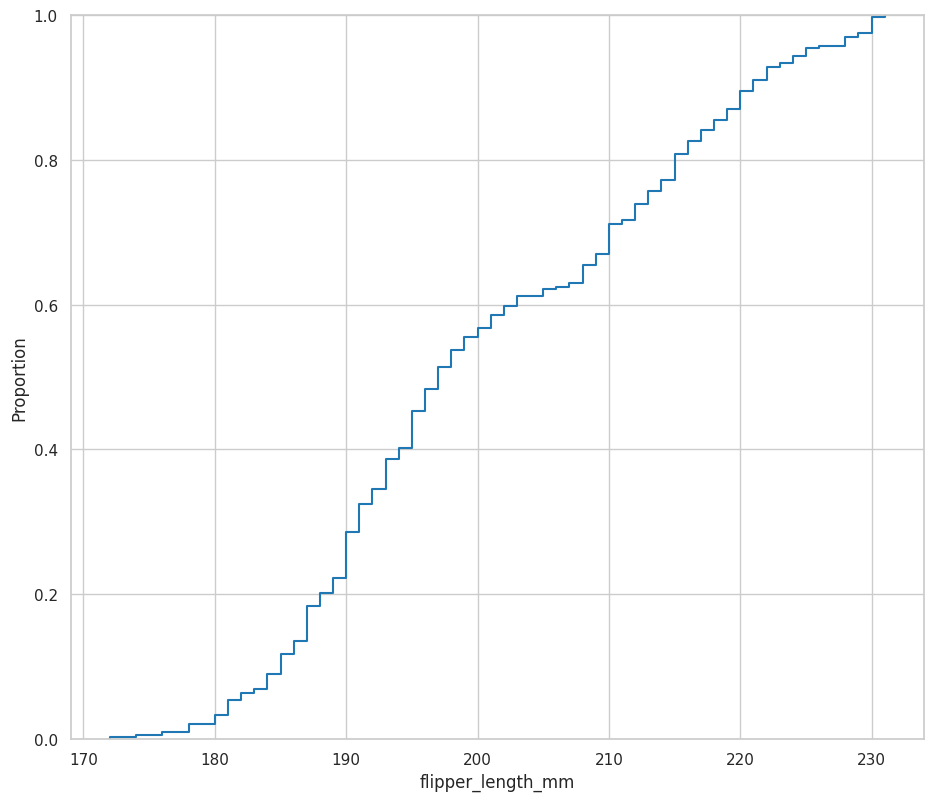

In [299]:
sns.ecdfplot(
    data=preprossed_penguins_df,
    x= 'flipper_length_mm'
)

### Utilizando `empiricaldist`

In [300]:
Cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    preprossed_penguins_df.flipper_length_mm,
    normalize=True
    

)

In [301]:
Cdf_flipper_length_mm.plot()

q = 200
p = Cdf_flipper_length_mm.forward(q)

0.5675675675675675 200


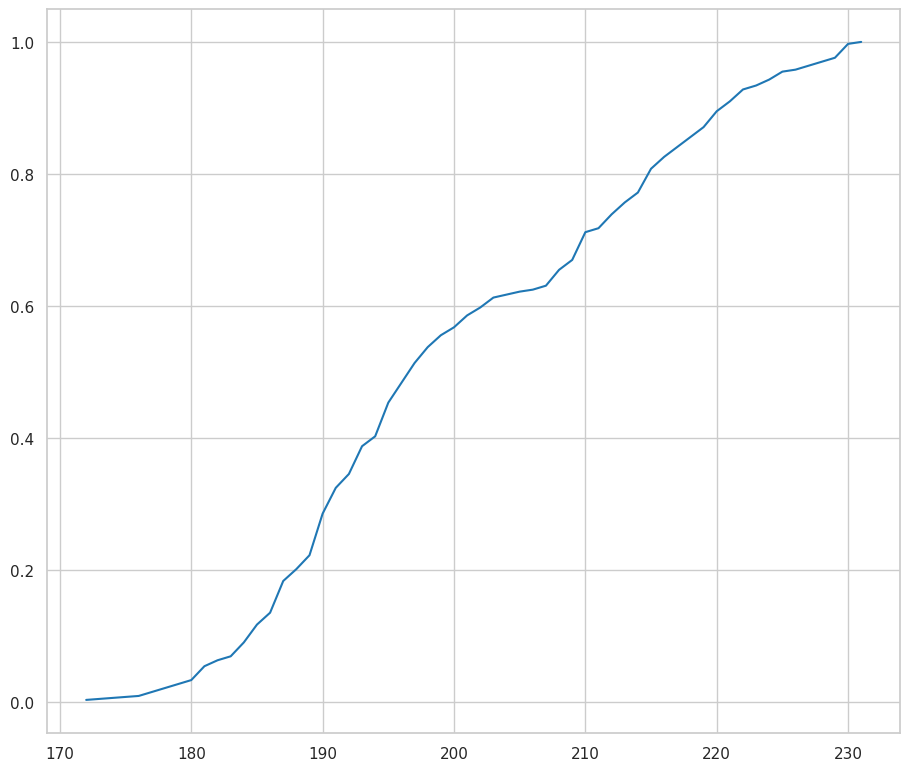

In [302]:
Cdf_flipper_length_mm.plot()

q = 200
p = Cdf_flipper_length_mm.forward(q)
print(p, q)

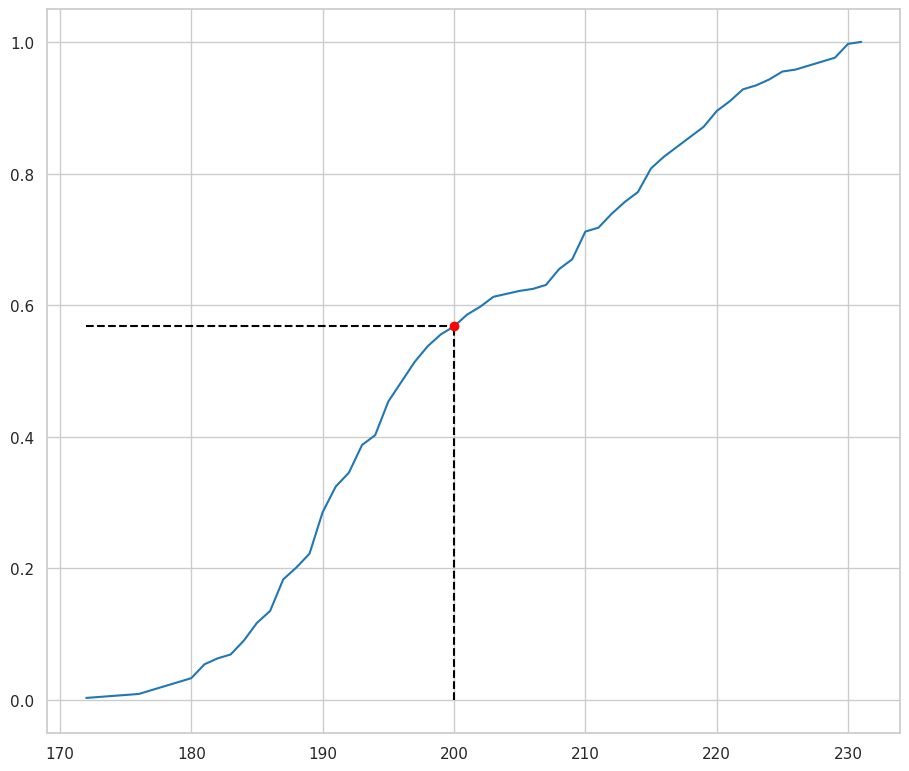

In [303]:
Cdf_flipper_length_mm.plot()

q = 200
p = Cdf_flipper_length_mm.forward(q)

plt.vlines( #posiscion de las lineas 
    x=q, #el valor que estamos buscando 
    ymin=0, #desde donde lo estamos buscando 
    ymax=p, #hazta donde queremos buscarlos 
    color='black',
    linestyles='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyles='dashed'

)

plt.plot(q, p, 'ro')
#aca estamos cruzando con una linea y un punto rojo el punto 
#exacto donde tenemos este valor de 200

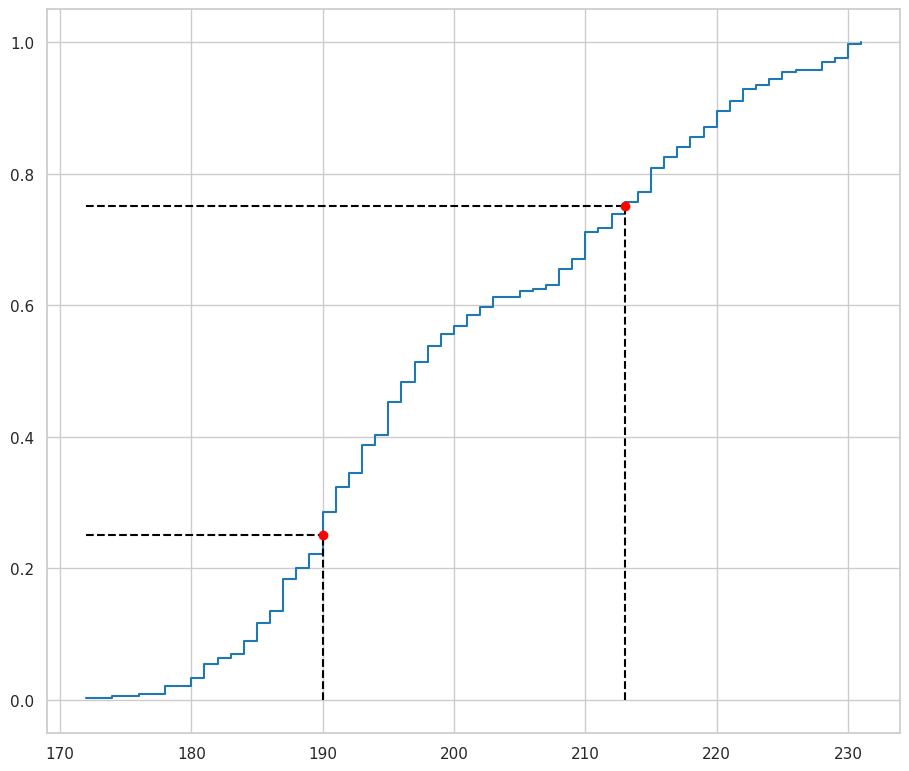

In [304]:
Cdf_flipper_length_mm.step()

p_1 = 0.25 #especificando la probabilidad
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = Cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyles='dashed'
)

plt.hlines(
    y=ps,
    xmin=Cdf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

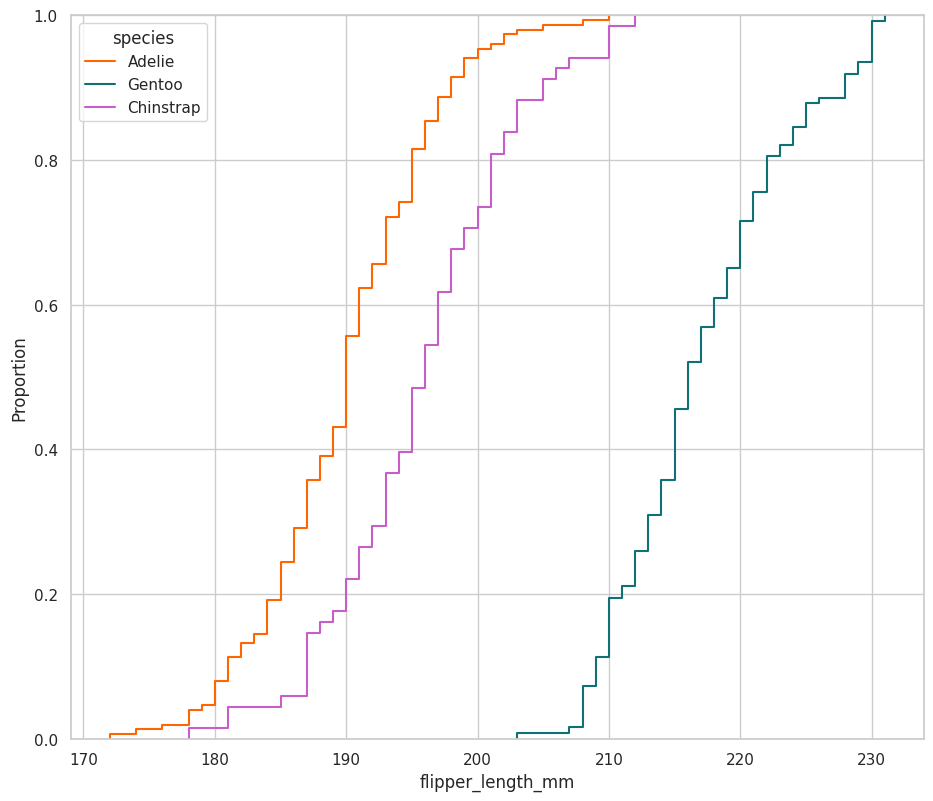

In [305]:
sns.ecdfplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)
#aca podemos observar la probabilidad acomulada de cada uno de los pinguinos

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

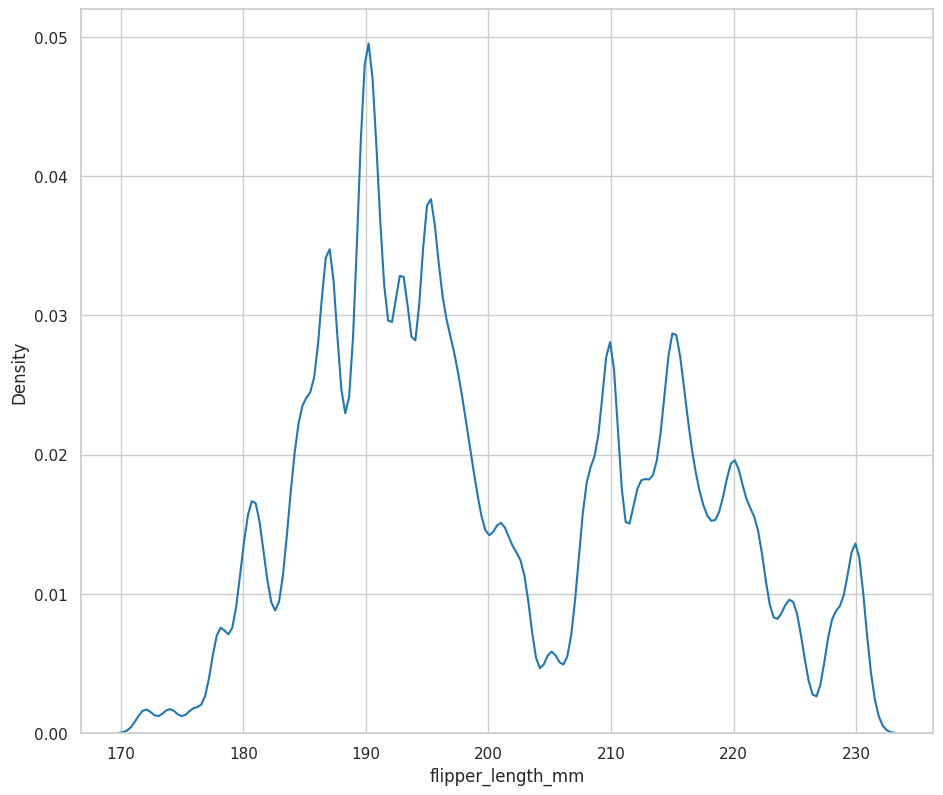

In [306]:
sns.kdeplot(
    data=preprocess_penguins_df,
    x = 'flipper_length_mm',
    bw_method=0.05 #con este parametro estamos dando diferentes valores a nuetra grafica 
    #estariamos cambiando el ancho de banda que podemos definir 
)

In [307]:
stats = preprocess_penguins_df.body_mass_g.describe()
stats # aca me esta imprimiendo los estadisticos 

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [308]:
xs = np.linspace(stats['min'], stats['max'])
xs

array([2700.        , 2773.46938776, 2846.93877551, 2920.40816327,
       2993.87755102, 3067.34693878, 3140.81632653, 3214.28571429,
       3287.75510204, 3361.2244898 , 3434.69387755, 3508.16326531,
       3581.63265306, 3655.10204082, 3728.57142857, 3802.04081633,
       3875.51020408, 3948.97959184, 4022.44897959, 4095.91836735,
       4169.3877551 , 4242.85714286, 4316.32653061, 4389.79591837,
       4463.26530612, 4536.73469388, 4610.20408163, 4683.67346939,
       4757.14285714, 4830.6122449 , 4904.08163265, 4977.55102041,
       5051.02040816, 5124.48979592, 5197.95918367, 5271.42857143,
       5344.89795918, 5418.36734694, 5491.83673469, 5565.30612245,
       5638.7755102 , 5712.24489796, 5785.71428571, 5859.18367347,
       5932.65306122, 6006.12244898, 6079.59183673, 6153.06122449,
       6226.53061224, 6300.        ])

In [309]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys

array([0.03056059, 0.03745582, 0.04557216, 0.05504607, 0.06601225,
       0.07859975, 0.0929276 , 0.1091002 , 0.12720261, 0.14729588,
       0.16941268, 0.19355346, 0.21968339, 0.24773013, 0.27758288,
       0.30909253, 0.34207329, 0.37630551, 0.41153992, 0.44750299,
       0.48390319, 0.52043813, 0.55680205, 0.59269345, 0.62782261,
       0.66191854, 0.69473525, 0.72605692, 0.75570199, 0.78352586,
       0.8094223 , 0.83332353, 0.85519902, 0.87505326, 0.89292249,
       0.90887086, 0.92298596, 0.9353742 , 0.94615603, 0.95546139,
       0.96342539, 0.97018445, 0.97587298, 0.98062054, 0.98454969,
       0.98777435, 0.99039874, 0.99251675, 0.99421182, 0.99555707])

In [310]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
ys

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    preprossed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: >

In [311]:
s = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
ys

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=preprossed_penguins_df,
    x='body_mass_g'

)

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

 #### Agrega una columna vacía al DataFrame preprocessed_penguins_df llamada 'x'. Luego, utiliza seaborn para crear un gráfico de distribución (histograma) basado en la columna 'x' y agrupado por la columna 'sex'. El gráfico resultante mostrará las distribuciones de 'x' para cada categoría de 'sex', permitiendo comparar visualmente cómo se distribuye 'x' según el género de los pingüinos.

# Ley de los Grandes Nuemeros y Teorema del Limite Central

### Ley de los Grandes numeros

In [312]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

In [313]:
for sample_size in (1e2, 1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    print(values)

[2. 2. 6. 2. 2. 5. 3. 5. 1. 3. 1. 1. 6. 1. 4. 3. 3. 6. 1. 4. 6. 4. 6. 1.
 3. 2. 5. 6. 2. 4. 2. 4. 3. 6. 4. 3. 1. 1. 2. 2. 6. 4. 4. 1. 6. 5. 1. 5.
 4. 1. 3. 3. 1. 6. 6. 5. 3. 3. 4. 4. 1. 4. 5. 3. 1. 5. 2. 2. 1. 2. 5. 4.
 2. 6. 6. 6. 2. 3. 6. 5. 1. 1. 3. 6. 4. 3. 1. 4. 5. 3. 5. 6. 2. 4. 2. 5.
 4. 4. 5. 3.]
[6. 4. 1. 5. 5. 2. 6. 6. 2. 6. 1. 2. 2. 6. 4. 1. 3. 4. 1. 6. 5. 4. 6. 3.
 6. 5. 4. 1. 6. 3. 1. 1. 4. 4. 5. 6. 1. 5. 2. 6. 5. 4. 5. 2. 3. 5. 3. 3.
 3. 5. 3. 2. 5. 5. 1. 2. 1. 3. 3. 5. 4. 4. 3. 6. 3. 6. 4. 1. 5. 2. 5. 1.
 2. 6. 2. 6. 2. 4. 5. 4. 2. 2. 1. 2. 4. 6. 6. 5. 5. 4. 2. 6. 5. 4. 1. 3.
 3. 6. 4. 3.]
[6. 1. 3. 1. 5. 6. 2. 6. 2. 6. 5. 5. 1. 6. 5. 2. 5. 2. 6. 1. 5. 4. 1. 2.
 1. 3. 2. 4. 2. 2. 5. 1. 6. 6. 5. 4. 6. 2. 1. 2. 5. 1. 4. 6. 6. 4. 1. 5.
 4. 1. 1. 6. 5. 5. 6. 4. 4. 3. 2. 3. 5. 4. 6. 3. 4. 4. 4. 5. 2. 4. 1. 3.
 3. 4. 6. 4. 5. 4. 4. 1. 2. 3. 3. 1. 1. 2. 6. 2. 3. 2. 4. 2. 2. 4. 1. 1.
 2. 1. 1. 3. 5. 4. 4. 2. 6. 3. 1. 4. 1. 3. 4. 6. 3. 5. 6. 1. 2. 3. 3. 3.
 6. 5. 4. 2. 5. 6. 5. 1

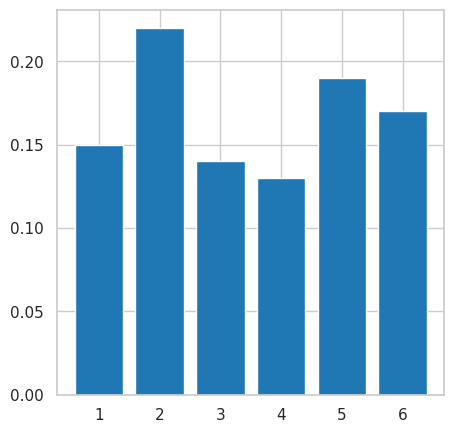

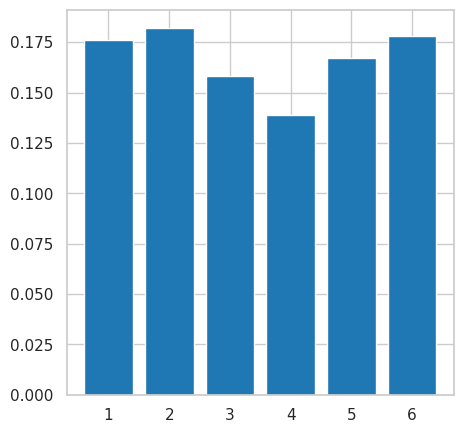

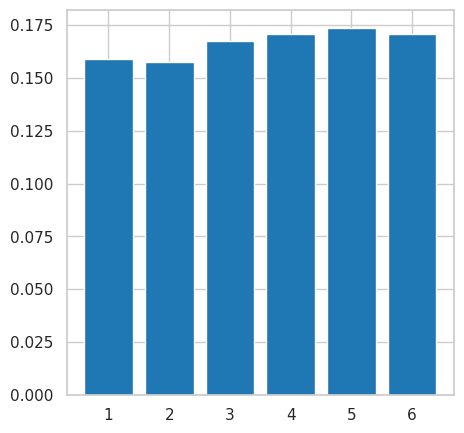

In [314]:
for sample_size in (1e2, 1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()

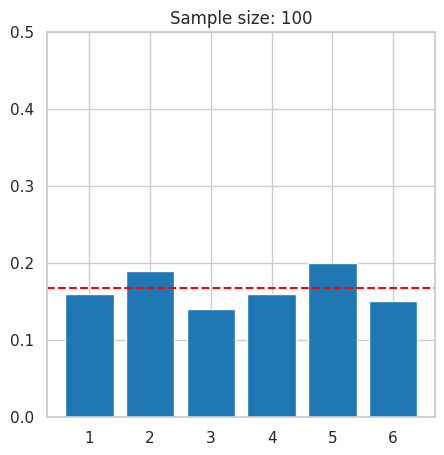

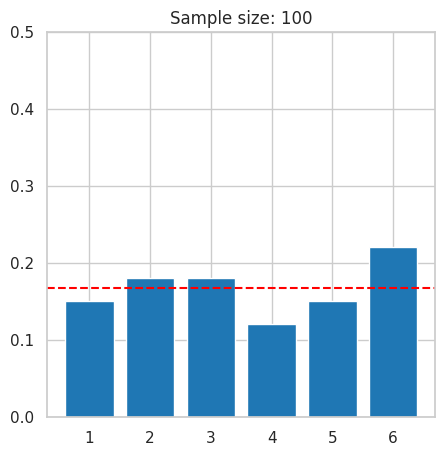

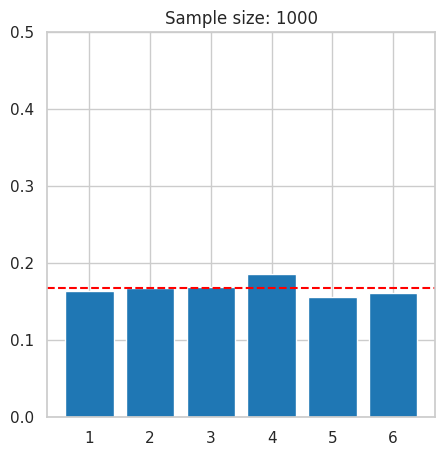

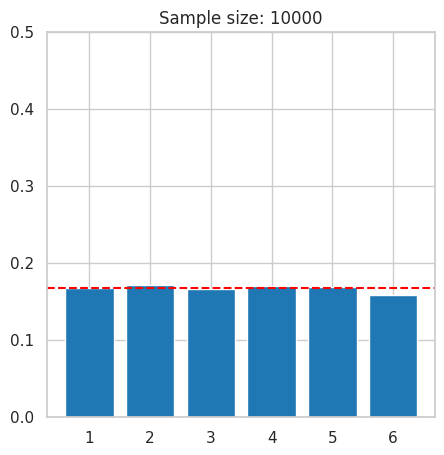

In [315]:
for sample_size in (1e2, 1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f'Sample size: {sample_size}')

### Teorema del LImite Central 

In [316]:
preprossed_penguins_df.sex.value_counts(normalize=True)#.plot(kind='bar')
 #como sabemos a esto se le conoce como una distribución binomial en la cual 
 #se tiene un valor posistivo y otro negarivo

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [317]:
sex_numeric = preprossed_penguins_df.sex.replace(['male', 'female'], [1, 0])
sex_numeric
#como podemos notar ya no es una categoria de macho y embras. ahora solo son numeros, 1 y

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [318]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_559/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Estimated percentage of male penguins in population is: 50.1829%


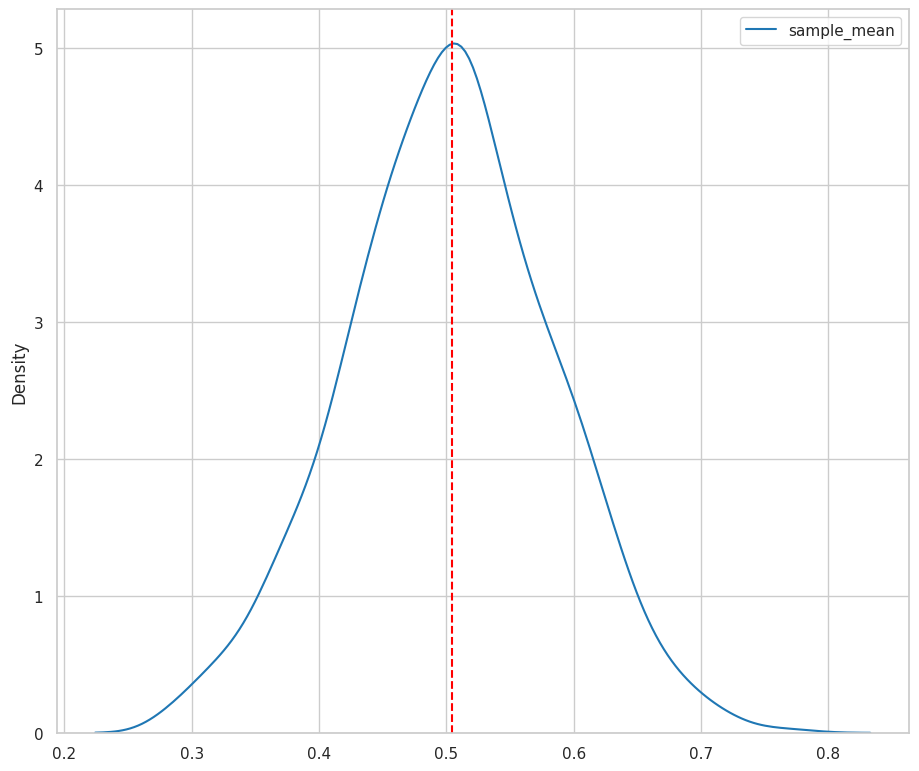

In [319]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [320]:
preprossed_penguins_df = pd.DataFrame(
    [[i, preprossed_penguins_df.iloc[:, 0:i].mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)


/tmp/ipykernel_559/3486872378.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  [[i, preprossed_penguins_df.iloc[:, 0:i].mean().mean()] for i in range(1, number_samples + 1)],


In [321]:
preprossed_penguins_df = pd.DataFrame(
    [[i, preprossed_penguins_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

In [322]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

(0.30450450450450445, 0.7045045045045044)

In [323]:
import random

# Set variables
number_samples = 1880
sample_size = 35
samples_df = pd.DataFrame()

# Set random seed
random.seed(42)

# Create samples and add to dataframe
for i in range(1, number_samples+1):
    preprossed_penguins_df = sex_numeric.sample(sample_size, replace=True).to_numpy()
    preprossed_penguins_df = f"Sample {i}"
    preprossed_penguins_df = pd.concat([samples_df, pd.DataFrame(sex_numeric_sample, columns=[sample_name])],axis=1)

# Calculate estimated percentage of male penguins in population
male_population_mean = preprossed_penguins_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean}")

Estimated percentage of male penguins in population is: 0.6285714285714286


In [324]:
import seaborn as sns

# Cargamos los datos de pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionamos la columna del largo del pico para la especie Adelia
adelia_bill_length = penguins[penguins['species']=='Adelie']['bill_length_mm']

In [325]:
import numpy as np

# Generamos 100 muestras aleatorias de tamaño 30
n_samples = 100
sample_size = 30
samples = np.random.choice(adelia_bill_length, size=(n_samples, sample_size))
means = samples.mean(axis=1)

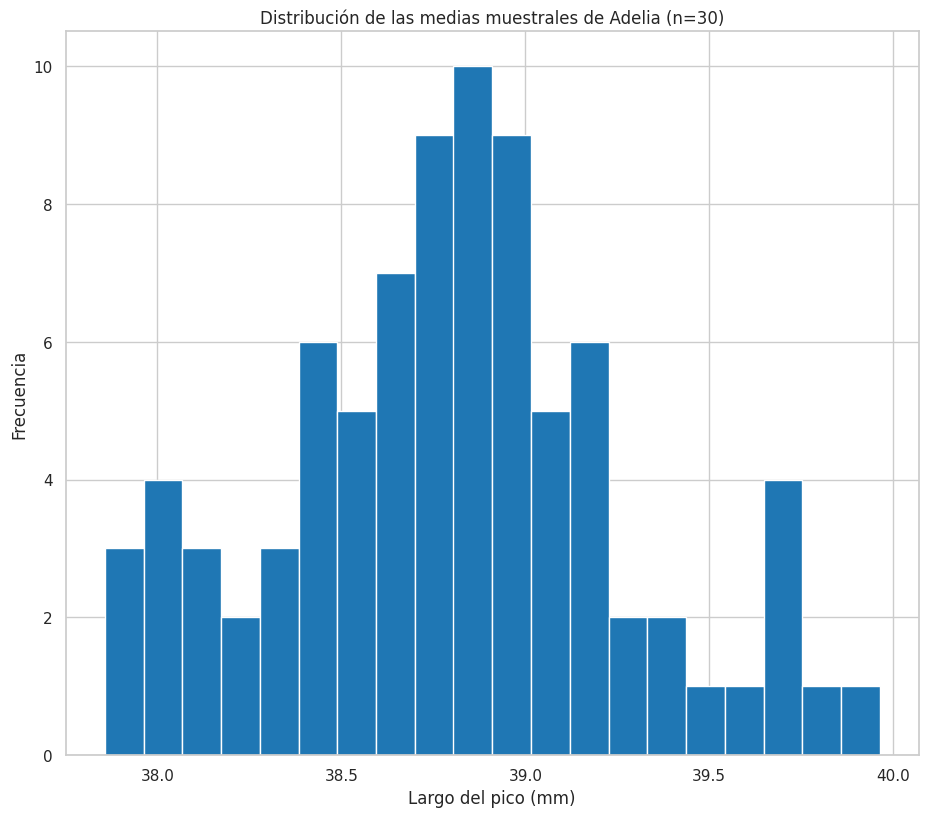

In [326]:
import matplotlib.pyplot as plt

# Graficamos la distribución de las medias muestrales
plt.hist(means, bins=20)
plt.title('Distribución de las medias muestrales de Adelia (n=30)')
plt.xlabel('Largo del pico (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Estableciendo relaciones:Graficas de puntos 

In [327]:
preprossed_penguins_df

sample_1000
0             1
1             0
2             1
3             0
4             1
5             1
6             1
7             1
8             0
9             1
10            1
11            1
12            1
13            1
14            1
15            1
16            1
17            1
18            0
19            1
20            1
21            0
22            0
23            1
24            1
25            1
26            0
27            0
28            1
29            0
30            0
31            1
32            0
33            0
34            0

In [328]:
preprossed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
#aca ya tenemos nuetros datos procesados y limpios 
preprossed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

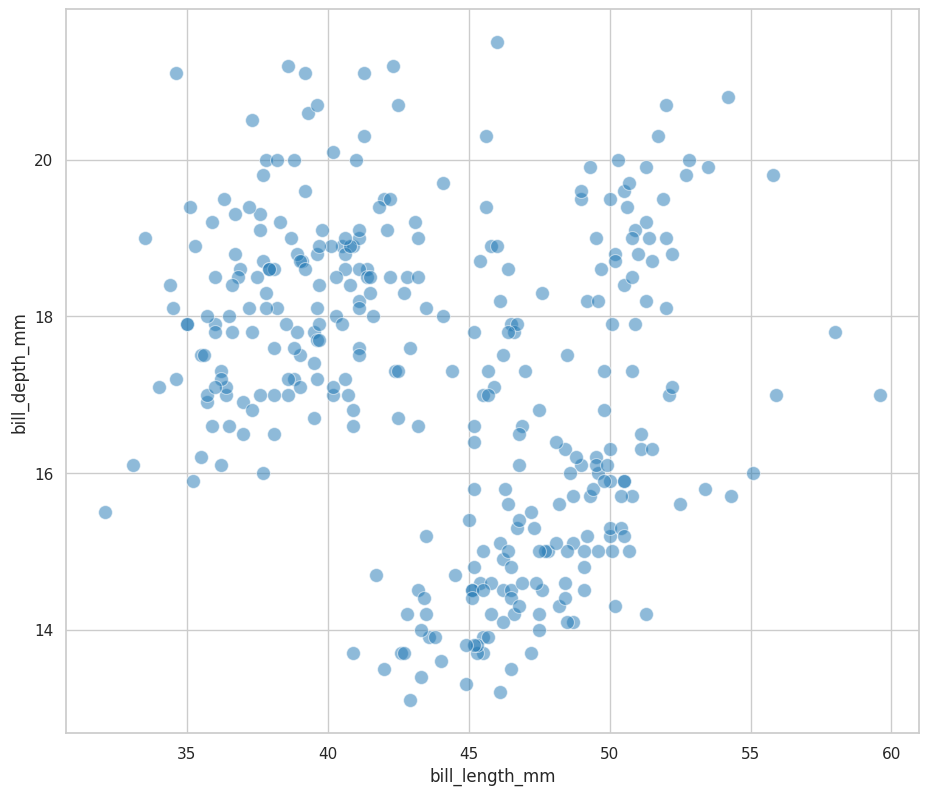

In [329]:
#creando nuetra grafica de dispersion 
sns.scatterplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100

)

In [330]:
#creando un histograma 2D
sns.displot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True # con rug nos mostrara una linea indicando que tan juntos esta nuetros datos 
)

In [331]:
#creando un histograma 2D densidades 
#sns.displot(
    #data=preprossed_penguins_df,
    #x='bill_length_mm',
    #y='bill_depth_mm',
    #rug=True,
    #kind='kde'

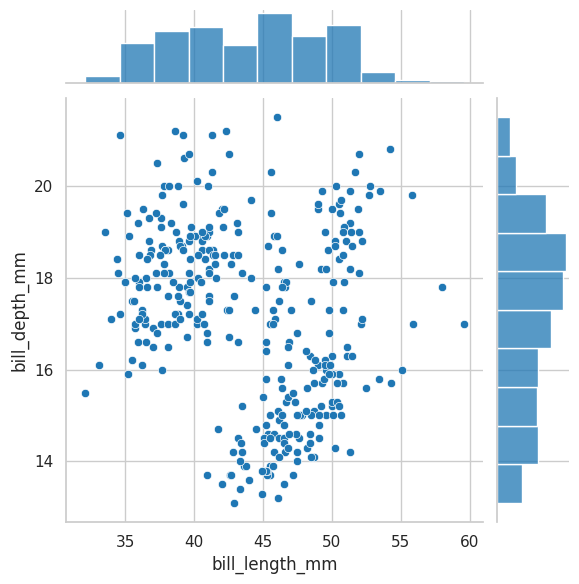

In [332]:
sns.jointplot( #aca generamos un grafico que es un grafico de dispersion e histograma 
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

In [333]:
import seaborn as sns

# Cargamos los datos de pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionamos los datos de la especie Adelia
adelia = penguins[penguins['species'] == 'Adelie']

# Creamos el gráfico de puntos
sns.scatterplot(x=adelia['bill_length_mm'], y=adelia['body_mass_g']),
alpha=2/2,
s=200

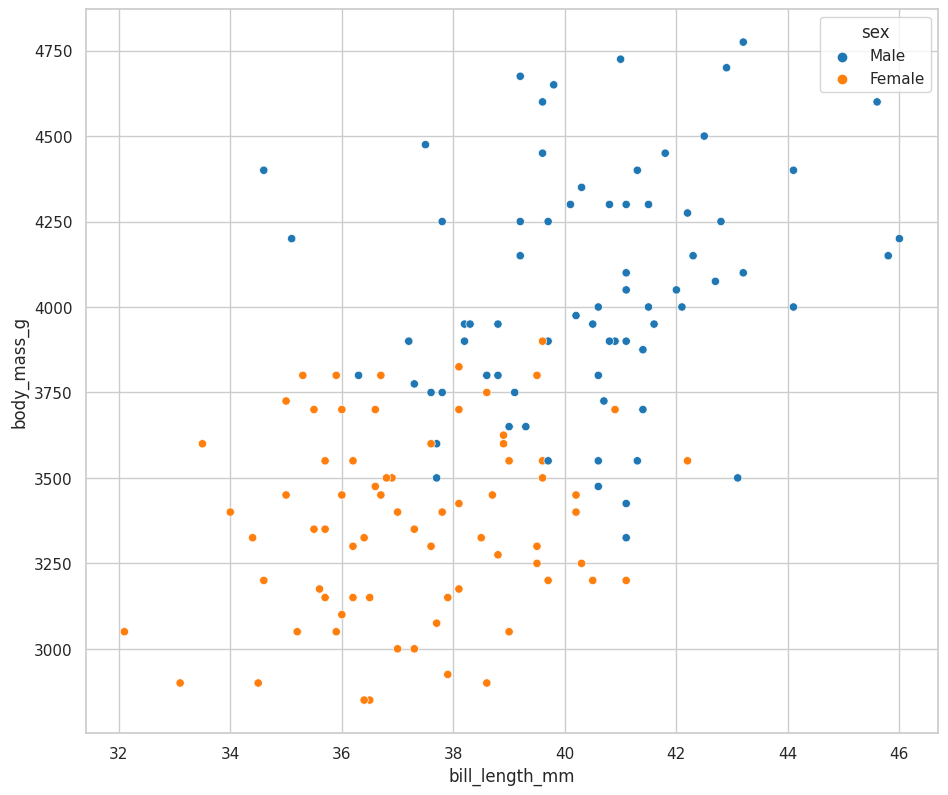

In [334]:
# Creamos el gráfico de puntos con diferentes colores para los géneros
sns.scatterplot(x=adelia['bill_length_mm'], y=adelia['body_mass_g'], hue=adelia['sex']),
alpha=2/2,
s=200

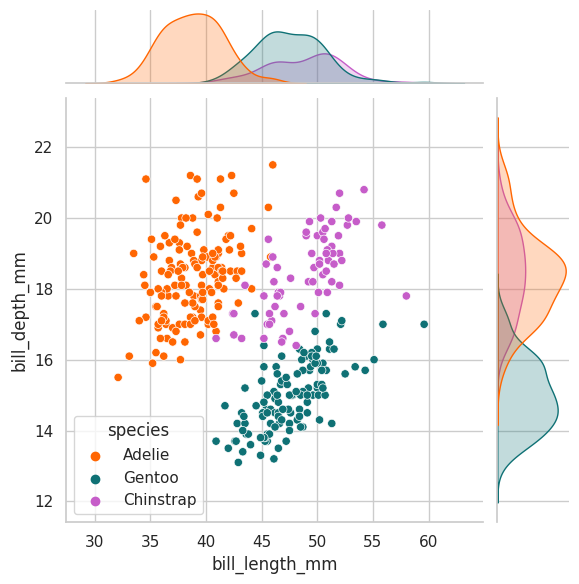

In [335]:
sns.jointplot(
data=preprossed_penguins_df ,
x='bill_length_mm',
y='bill_depth_mm',
palette=penguin_color,
hue='species'
)

 Muestra la relación entre las variables 'bill_length_mm' y 'bill_ depth_mm'. Cada punto en el diagrama de dispersión representa un pingüino y su posición en el gráfico indica los valores correspondientes de longitud del pico (bill_length_mm) en el eje xy profundidad del pico (bill_ depth_mm) en el eje y. Los puntos se colorearán según la especie de pingüino a través del parámetro `hue`, lo que permite distinguir visualmente la distribución de las especies en el espacio bidimensional. -

In [336]:
sns.displot(
    data=preprossed_penguins_df ,
    x='body_mass_g',
    y='sex'
)

Eje x: Muestra la variable 'body_mass_g', que representa la masa corporal de los pingüinos. Los valores se agrupan en diferentes rangos y el gráfico muestra la frecuencia de los valores dentro de cada rango.

Eje y: Muestra las categorías de la variable 'sex', que representa el género de los pingüinos. 
Cada categoría se r

gráfico de distribución generado por sns.displot() muestra la distribución de los valores de masa corporal (body_mass_g) en el eje x y la distribución de las categorías de género (sex) en el eje y. Proporciona información sobre la frecuencia de los valores y permite comparar visualmente las distribuciones entre las categorías de género.

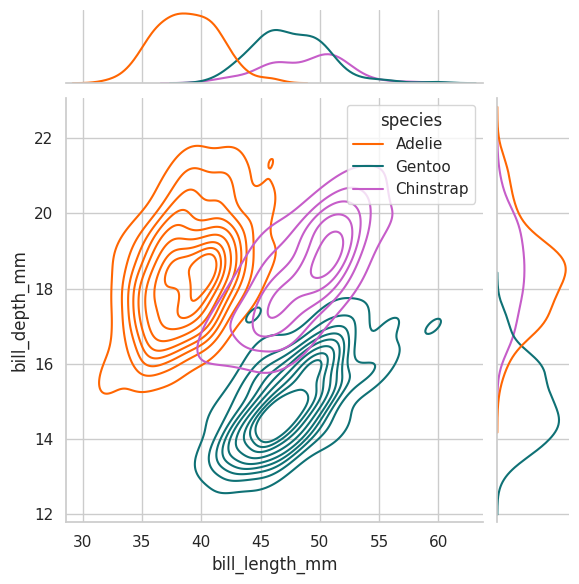

In [337]:
sns.jointplot(
    data = preprocess_penguins_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm',
    kind = 'kde',
    palette=penguin_color,
    hue='species'
)

# Estableciendo relaciones: Gaficos de violinn y boxplots

In [338]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

### Eje x: Muestra la variable 'island', que representa las diferentes islas donde se encontraron los pingüinos. Cada isla se representa en el eje x y se muestran los puntos correspondientes en el gráfico.

### Eje y: Muestra la variable 'body_mass_g', que representa la masa corporal de los pingüinos en gramos. Los valores se posicionan en el eje y y permiten observar la variación en la masa corporal de los pingüinos.

#### Puntos: Cada punto en el gráfico de dispersión representa un pingüino y su posición en el gráfico indica los valores correspondientes de isla en el eje x y masa corporal en gramos en el eje y. Los puntos se colorearán según la especie de pingüino a través del parámetro hue, lo que permite distinguir visualmente la distribución de las especies en el gráfico.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

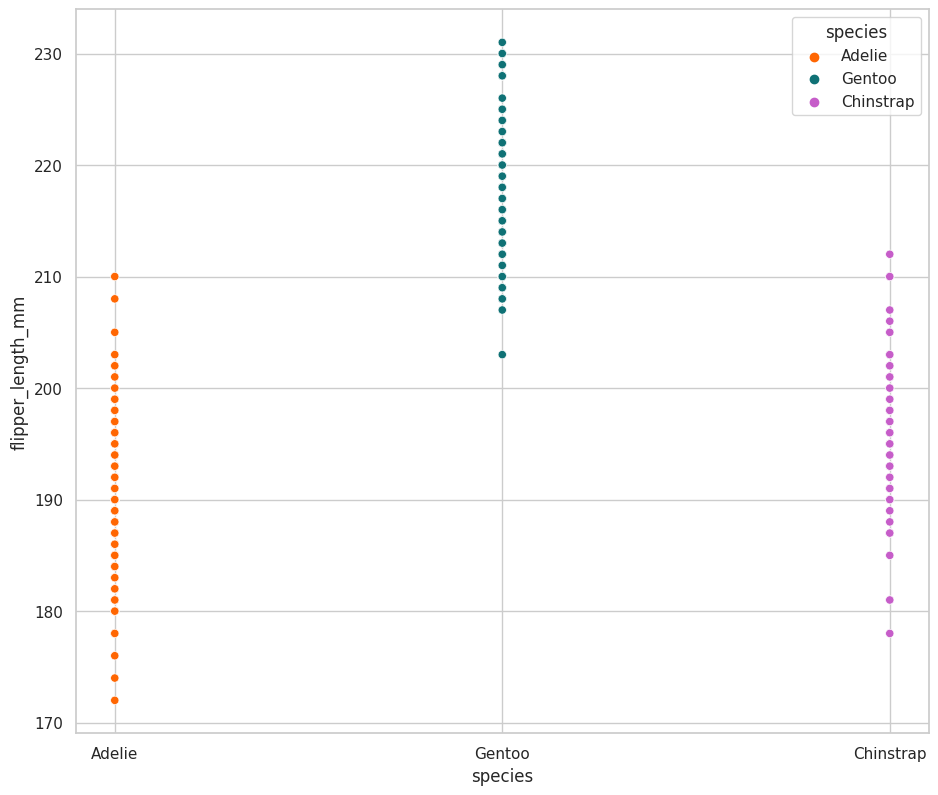

In [339]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

#### El gráfico de dispersión generado por sns.scatterplot() muestra la relación entre las variables 'island' y 'body_mass_g' y permite visualizar cómo se distribuyen los pingüinos en función de la isla y su masa corporal. Además, se utiliza el parámetro hue y la paleta de colores penguin_color para diferenciar visualmente las especies de pingüinos en el gráfico, lo que permite analizar cómo se distribuyen en función de las variables seleccionadas.

## Otras graficas 


In [340]:
ax = sns.boxplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
    
)

ax = sns.stripplot( #combinando nuetras graficas 
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

#### Muestra la distribución de la longitud de la aleta para cada especie de pingüino mediante cajas. La caja representa el rango intercuartil (IQR), donde la línea media de la caja es la mediana. Los bigotes indican el rango de los valores no atípicos, y los puntos más allá de los bigotes se consideran valores atípicos.

/tmp/ipykernel_559/3594480722.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


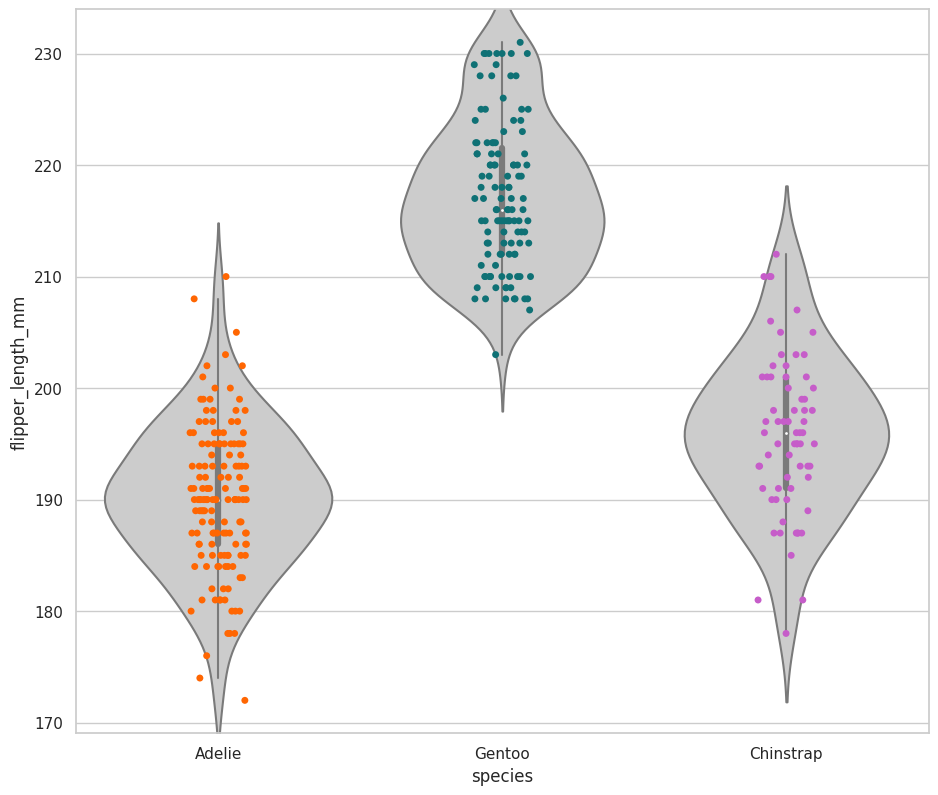

In [341]:
ax = sns.violinplot(
    data=preprossed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
     data=preprossed_penguins_df,
     x='species',
     y='flipper_length_mm',
     palette=penguin_color
 )

#### Muestra cada punto de datos individual como una línea vertical en el gráfico. Cada punto representa la longitud de la aleta para un pingüino específico y se distribuyen a lo largo del eje y según la especie de pingüino en el eje x. El parámetro color='.3' establece el color de los puntos.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

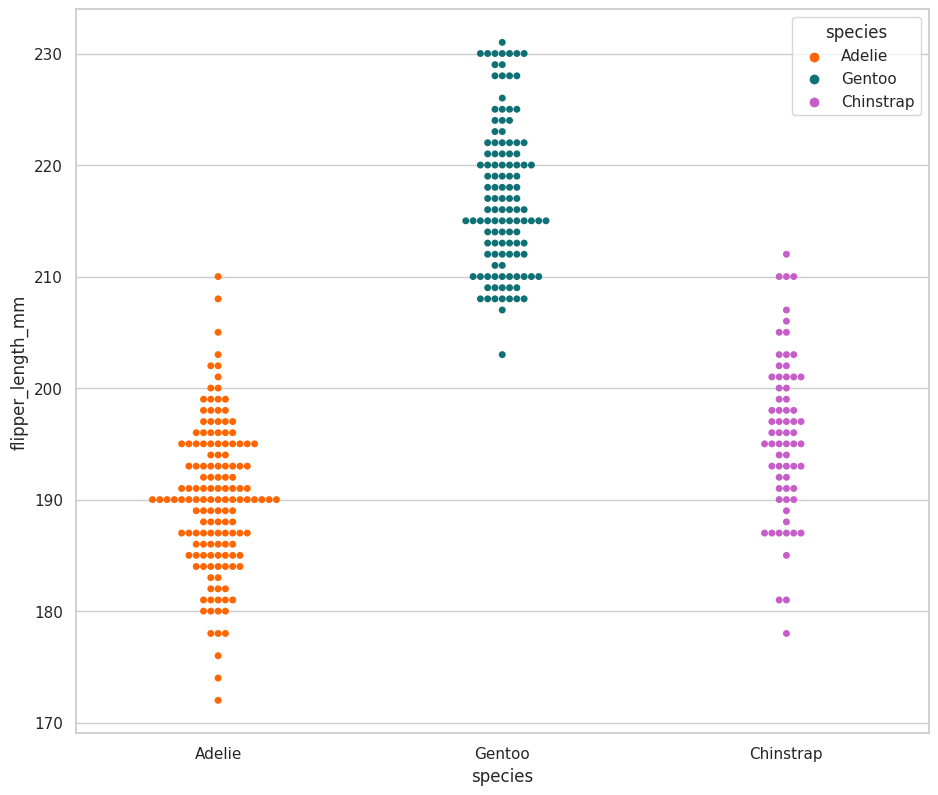

In [342]:
sns.swarmplot(
    data=preprossed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

#### Muestra la distribución de la longitud de la aleta para cada especie de pingüino mediante violines. Los violines combinan un diagrama de densidad y un boxplot. El ancho de cada violín representa la densidad de los valores en esa región, mientras que la caja dentro del violín muestra el rango intercuartil. El parámetro color='.8' establece el color de los violines.

## En resumen
- Estas tres gráficas proporcionan diferentes formas de visualizar la distribución de la longitud de la aleta según la especie de pingüino. El boxplot muestra resúmenes estadísticos, el stripplot muestra cada punto de datos individual y el violinplot combina un diagrama de densidad y un boxplot. Al combinar estas gráficas, se puede obtener una comprensión más completa de la distribución de los datos y las diferencias entre las especies de pingüinos en términos de la longitud de la aleta.

# Estableciendo relaciones: matrices de correación

#### ¿Existe una correlación lineal entre alguna de nuetras valiables?

In [343]:
preprocess_penguins_df.corr()

/tmp/ipykernel_559/1066531133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   
year                     0.054545      -0.060354           0.169675   

                   body_mass_g      year  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000

### ¿como podria visualiza los coeficientes de correlación?

In [344]:
sns.heatmap( #generando la palete de coloeres del datafrem
    data=preprossed_penguins_df.corr(),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

/tmp/ipykernel_559/2797005072.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprossed_penguins_df.corr(),


<AxesSubplot: >

#### Heatmap (sns.heatmap):
Muestra una representación visual de las correlaciones entre todas las variables del DataFrame preprocessed_penguins_df. Los valores de correlación se representan mediante colores en una cuadrícula. Cuanto más cercano sea el valor a 1 (o -1), más fuerte es la correlación positiva (o negativa) entre las variables. El parámetro center=0 establece el punto central del mapa de calor en 0, vmin=-1 y vmax=1 establecen los valores mínimo y máximo para el mapa de color, linewidth=0.5 agrega líneas divisorias entre las celdas y annot=True muestra los valores de correlación en cada celda.

In [345]:
sns.heatmap(
    data=preprossed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

/tmp/ipykernel_559/999288160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprossed_penguins_df.corr(),


<AxesSubplot: >


Es similar al heatmap anterior, pero se utiliza una paleta de colores personalizada. La función sns.diverging_palette(20, 230, as_cmap=True) crea una paleta de colores divergente que va desde el color 20 al color 230. Esto permite resaltar las correlaciones positivas y negativas de manera más clara.

/tmp/ipykernel_559/601393315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprossed_penguins_df.corr(),


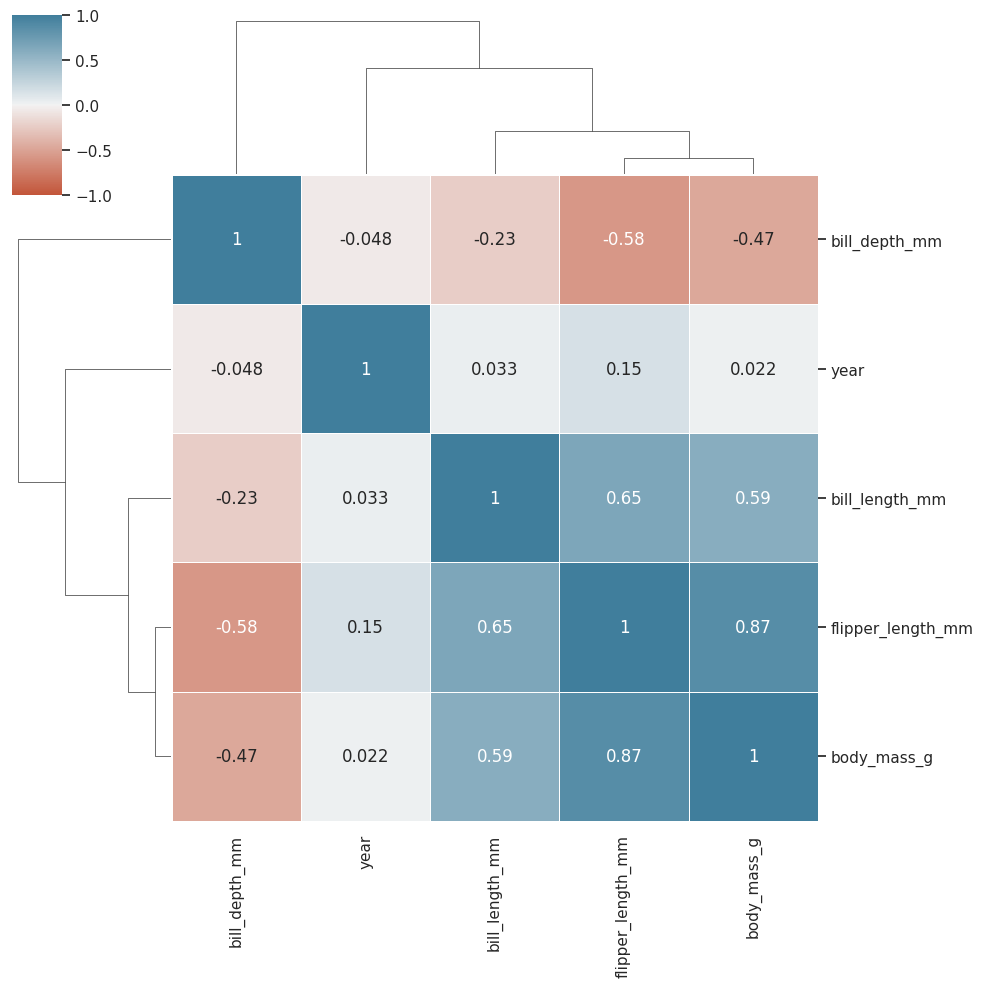

In [346]:
sns.clustermap(
    data=preprossed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
) 
#agrupando nuetros datos de cuales tiene una correlacion fuerte y culaes tienen una correlación muy debil

Muestra un mapa de calor similar al heatmap, pero con una característica adicional de agrupamiento jerárquico. Las variables se agrupan y se organizan según su similitud de correlación. Esto permite identificar patrones y agrupaciones de variables con correlaciones similares.

 #### estas tres gráficas permiten visualizar las correlaciones entre las variables del DataFrame preprocessed_penguins_df. El heatmap muestra las correlaciones de manera general, el heatmap con paleta personalizada resalta las correlaciones positivas y negativas, y el clustermap agrega el agrupamiento jerárquico para identificar patrones y agrupaciones de correlaciones. Estas visualizaciones son útiles para comprender la estructura de correlación de los datos y detectar posibles relaciones entre las variables.

# ¿Como podria reprecentar una variable categorica como numerica discreta

In [347]:
preprossed_penguins_df['numeric_sex']=preprossed_penguins_df.apply(lambda x: 1 if x['sex']=='male' else 0,axis=1)
preprossed_penguins_df.head()

/tmp/ipykernel_559/2910595413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprossed_penguins_df['numeric_sex']=preprossed_penguins_df.apply(lambda x: 1 if x['sex']=='male' else 0,axis=1)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  numeric_sex  
0       3750.0    male  2007            1  
1       3800.0  female  2007            0  
2       3250.0  female  2007            0  
4       3450.0  female  2007            0  
5       3650.0    male  2007            1

/tmp/ipykernel_559/1097674867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprossed_penguins_df.corr(),


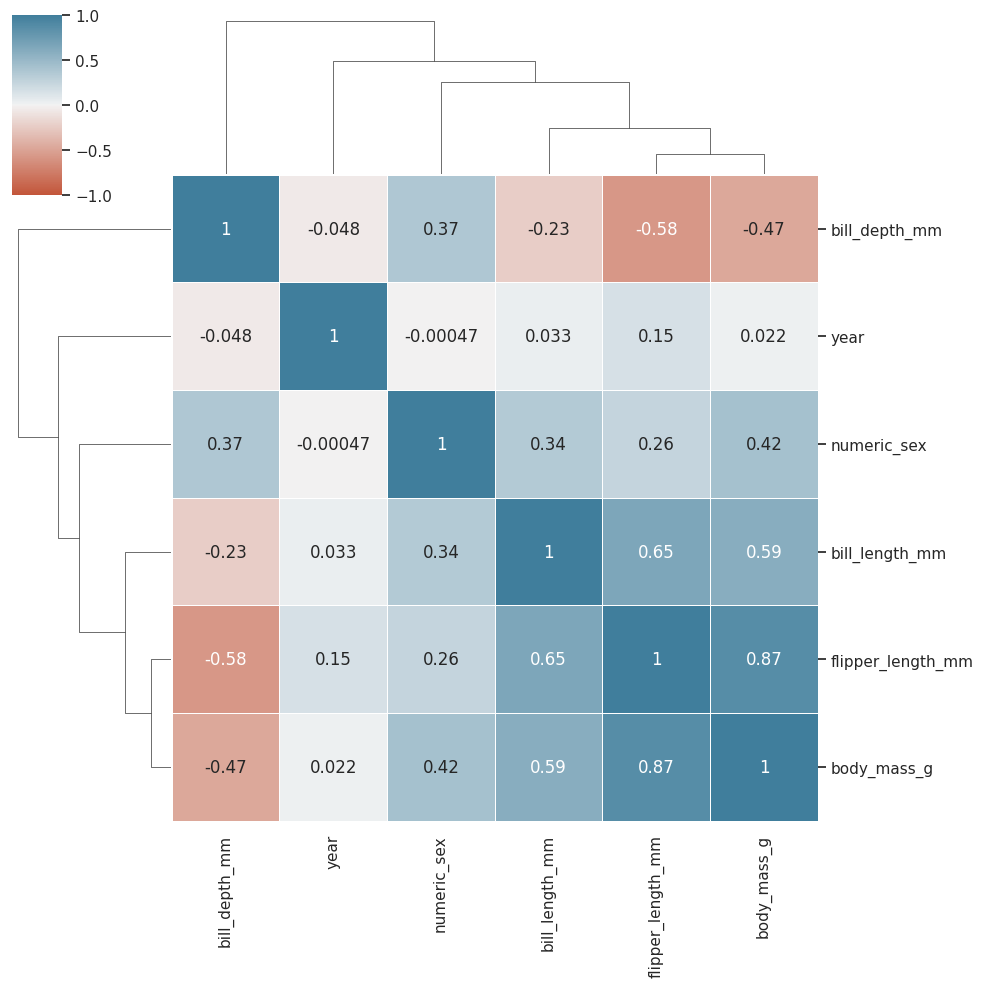

In [348]:
sns.clustermap(
    data=preprossed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=0.5,
    annot=True
)

In [349]:

# Cargamos los datos de pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionamos las variables numéricas
numeric_vars = penguins.select_dtypes(include=['float64', 'int64'])

# Creamos la matriz de correlación
corr_matrix = numeric_vars.corr()

# Visualizamos la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot: >

# ¿Cuales son algunas limitantes de los coeficientes de correlacioem lieneal 

### Solo nos ayudar a determinar las posible exitencia de una correalció nlinea; sin embargo, su ausencia no significa que no exista otro tipo de correlación

<AxesSubplot: >

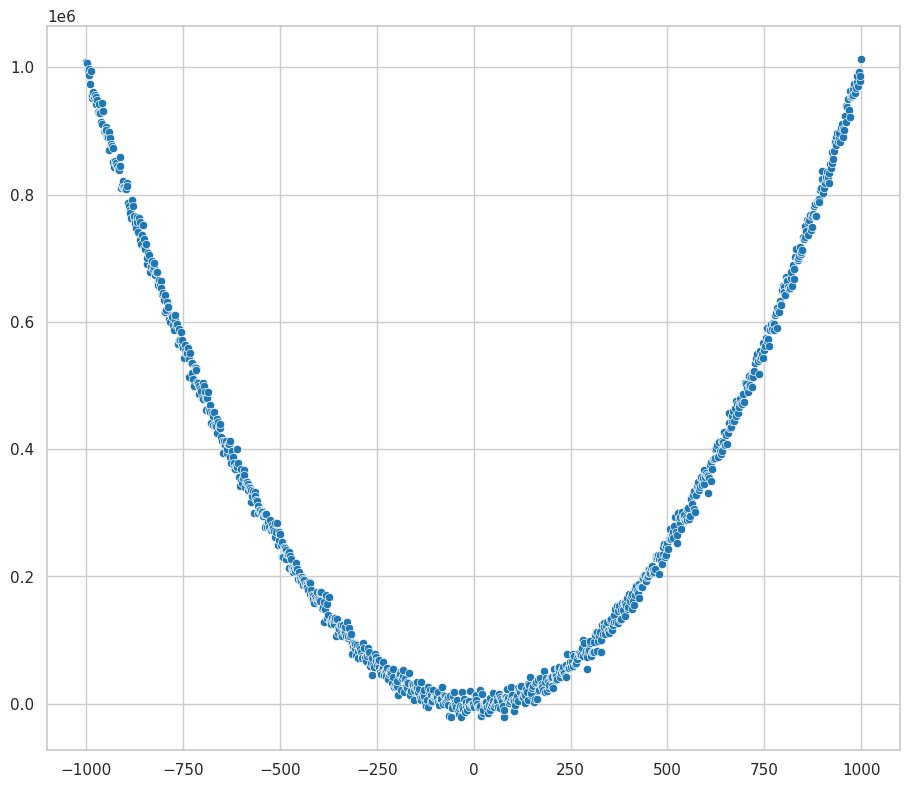

In [350]:
#generando el conjunto de datos 
x = np.linspace(-1000, 1000, 1000)
y = x**2
y += np.random.normal(0,10000, x.size)
sns.scatterplot(
    x=x, y=y
)

In [351]:
# como octener el coeficiente de correlacion linela sin tener los datos en un datafremm 
x = np.linspace(-1000, 1000, 1000)
y = x**2
y += np.random.normal(0,10000, x.size)
sns.scatterplot(
    x=x, y=y
)

<AxesSubplot: >

In [352]:
x = np.linspace(-1000, 1000, 1000)
y = x**3 # trabajando los datos de manera cubica 
y += np.random.normal(0,10000, x.size)
sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x, y) # generando la correlacion

array([[1.       , 0.9165156],
       [0.9165156, 1.       ]])

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

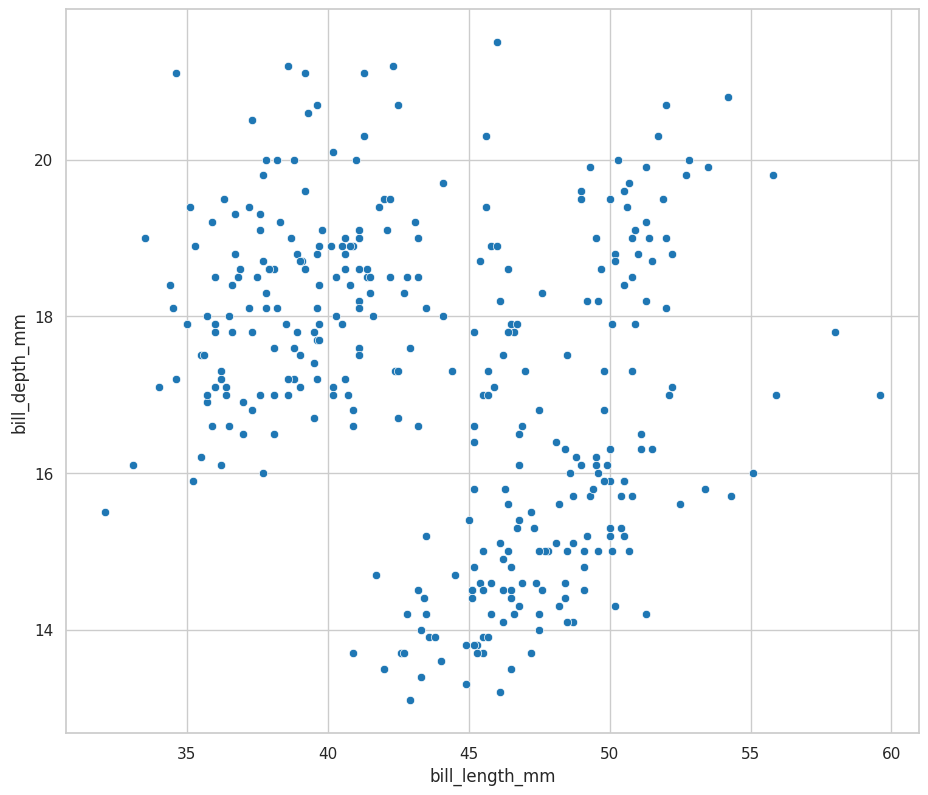

In [353]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

Las gráficas y cálculos anteriores proporcionados muestran diferentes formas de visualizar y calcular la correlación entre variables. Esto puede ser útil para comprender la relación entre las variables, identificar patrones y evaluar la fuerza de la relación lineal en diferentes conjuntos de datos.

### El coeficiente de correlacion no nos habla del impacto de la relacion 

In [354]:
#podemos tener un coeficiente de correlacion mas lato uno que el otro
np.random.seed(42)
x_1 = np.linspace(0, 1000, 1000)
y_1 = 0.1 * x_1 +3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=x_1
)

x_2 = np.linspace(0, 1000, 1000)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

[[1.         0.99918302]
 [0.99918302 1.        ]]
[[1.         0.99266853]
 [0.99266853 1.        ]]


### Estableciendo relaciones: Analisis de regrecion simple 

In [355]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.09990099223081761, intercept=3.0105300978717224, rvalue=0.9991830234242779, pvalue=0.0, stderr=0.00012790589602893127, intercept_stderr=0.07386498129747847)
LinregressResult(slope=0.49764387318266656, intercept=32.59910171941891, rvalue=0.9926685309456506, pvalue=0.0, stderr=0.0019180599211787715, intercept_stderr=1.107669502375924)


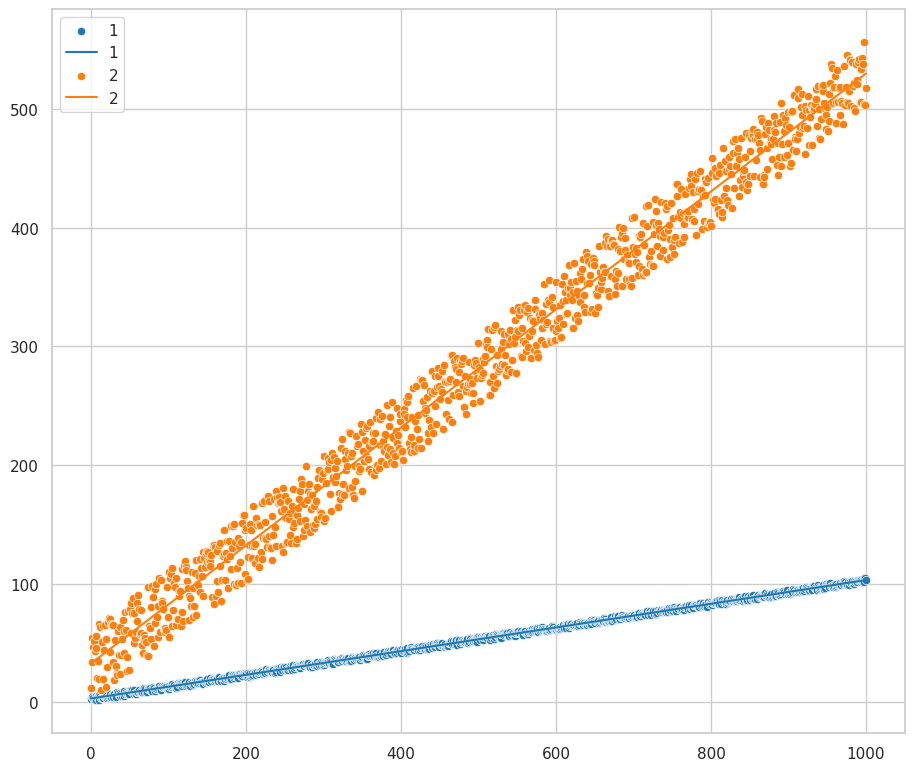

In [356]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()]) 
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

#como podemos notar el cambio aca es muy grande 

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


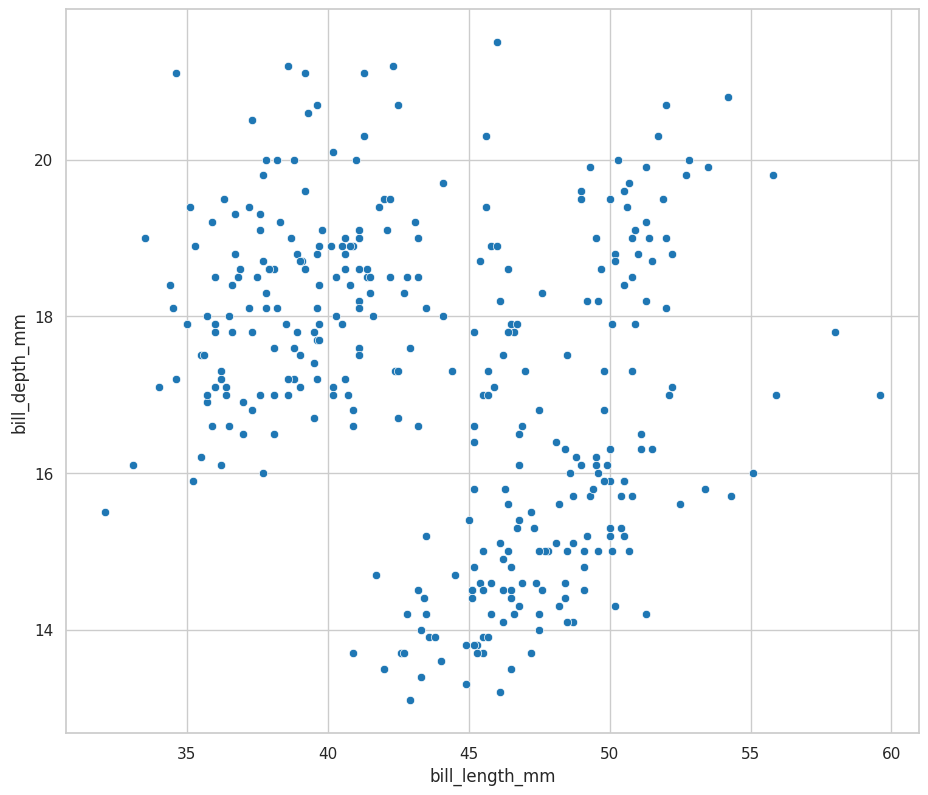

In [357]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x=preprossed_penguins_df.bill_length_mm,
    y=preprossed_penguins_df.bill_depth_mm
)

print(res_penguins)

In [358]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(
    x=preprossed_penguins_df.bill_length_mm,
    y=preprossed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1 = np.array([preprossed_penguins_df.bill_length_mm.min(), preprossed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1, fy_1)
# aca tenemos un slope negativo 
#aca nos muestra que cuando hay un cambio posistivo en x hay un acambio negativo en y

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


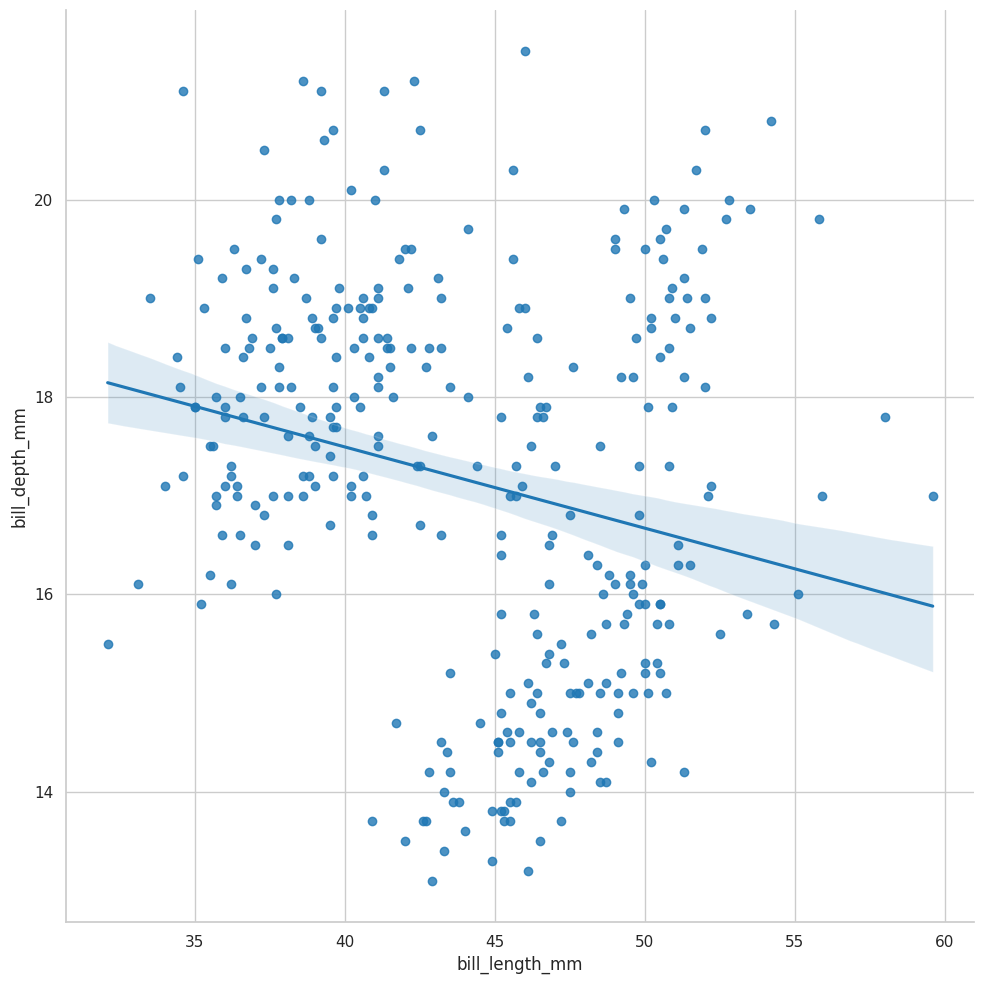

In [359]:
sns.lmplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)
#la linea pintada de azul que se sombreo es un interbalo de confianza 

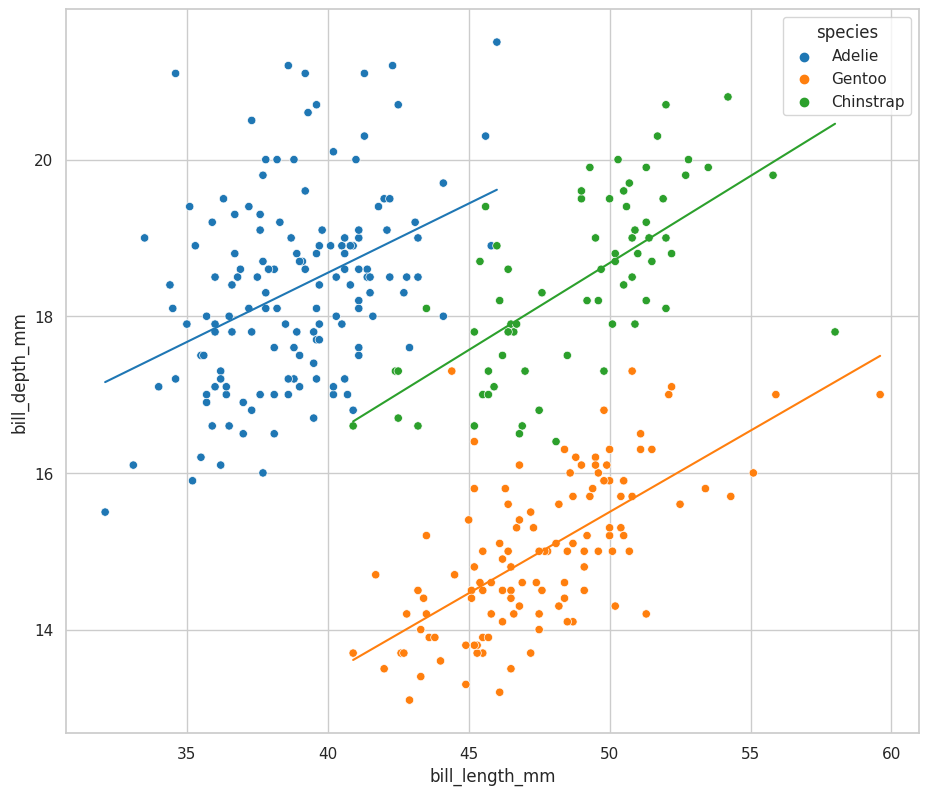

In [360]:
species_df = preprossed_penguins_df.set_index('species')
adelie_df= species_df.loc[['Adelie']]
gentoo_df= species_df.loc[['Gentoo']]
chinstrap_df= species_df.loc[['Chinstrap']]

sns.scatterplot(
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

res_adelie= scipy.stats.linregress(
    x=adelie_df.bill_length_mm,
    y=adelie_df.bill_depth_mm
)

fx1= np.array([adelie_df.bill_length_mm.min(), adelie_df.bill_length_mm.max()])
fy1= res_adelie.intercept + res_adelie.slope * fx1

plt.plot(fx1, fy1)

res_gentoo= scipy.stats.linregress(
    x=gentoo_df.bill_length_mm,
    y=gentoo_df.bill_depth_mm
)

fx2= np.array([gentoo_df.bill_length_mm.min(), gentoo_df.bill_length_mm.max()])
fy2= res_gentoo.intercept + res_gentoo.slope * fx2

plt.plot(fx2, fy2)

res_chinstrap= scipy.stats.linregress(
    x=chinstrap_df.bill_length_mm,
    y=chinstrap_df.bill_depth_mm
)

fx3= np.array([chinstrap_df.bill_length_mm.min(), chinstrap_df.bill_length_mm.max()])
fy3= res_chinstrap.intercept + res_chinstrap.slope * fx3

plt.plot(fx3, fy3)

- Se realiza una regresión lineal para cada especie de pingüino utilizando la función scipy.stats.linregress(). Luego, se generan los puntos correspondientes a las líneas de regresión utilizando los coeficientes de la regresión y los valores mínimo y máximo de la variable 'bill_length_mm'. Estos puntos se trazan utilizando plt.plot().
- En resumen, la gráfica muestra un scatter plot que representa la relación entre las variables 'bill_length_mm' y 'bill_depth_mm' para diferentes especies de pingüinos. Además, se trazan las líneas de regresión lineal para cada especie, lo que permite visualizar la tendencia general de la relación entre estas variables para cada grupo de especies.







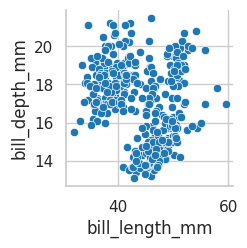

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos de pingüinos
penguins = sns.load_dataset('penguins')

# Creamos una matriz de dispersión de las variables bill_length_mm y bill_depth_mm
sns.pairplot(penguins, x_vars=['bill_length_mm'], y_vars=['bill_depth_mm'])
plt.show()

# Limitaciones de análisis de regresión simple


### La regresión lineal simple no simétrica 

In [362]:
#definiendo las variables x, y 
x = preprossed_penguins_df.bill_length_mm
y = preprossed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


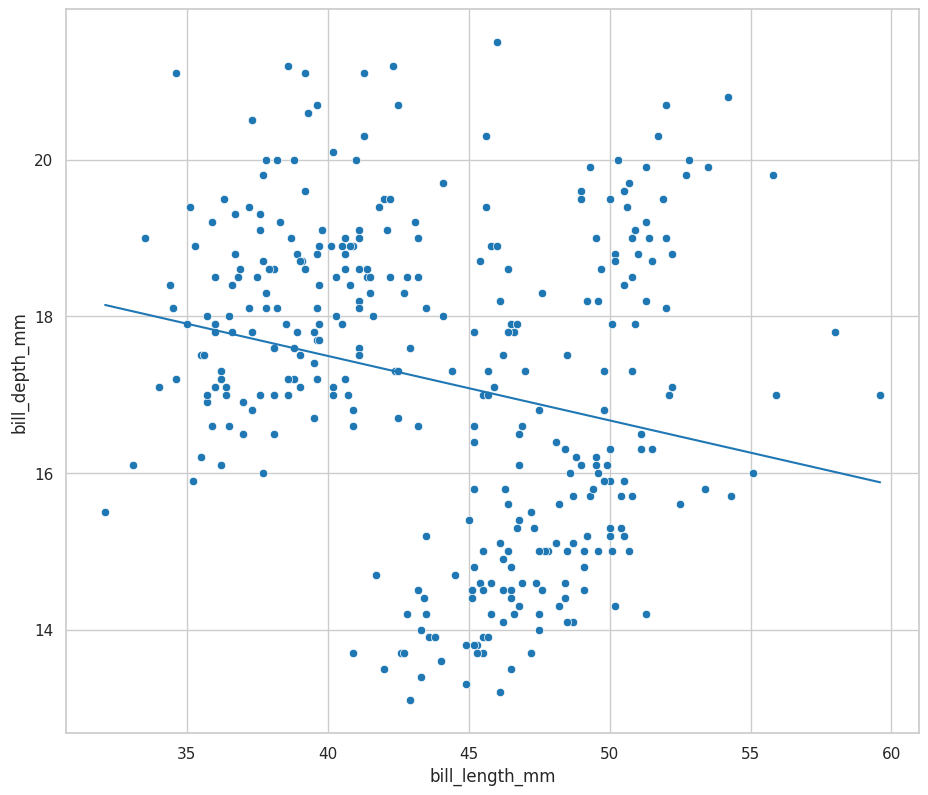

In [363]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

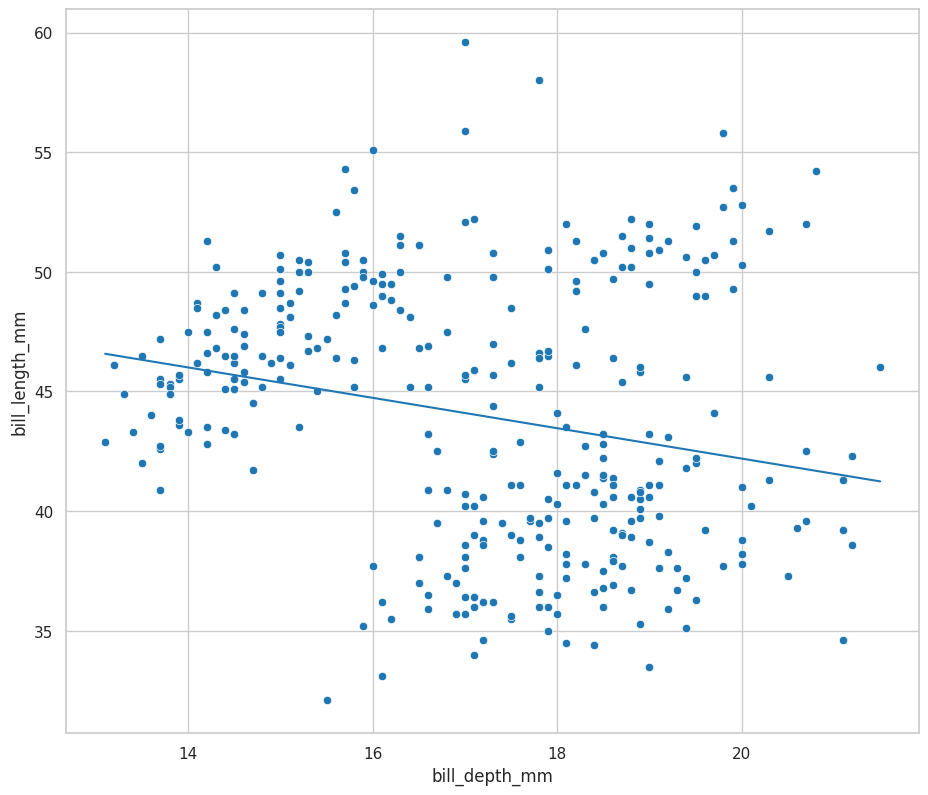

In [364]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)#

Se generan dos gráficas de dispersión utilizando sns.scatterplot(). La primera muestra 'bill_length_mm' en el eje x y 'bill_depth_mm' en el eje y, mientras que la segunda invierte los ejes. Luego, se generan las líneas de regresión para ambas gráficas utilizando los coeficientes de las regresiones calculadas previamente. Las líneas se trazan utilizando plt.plot().

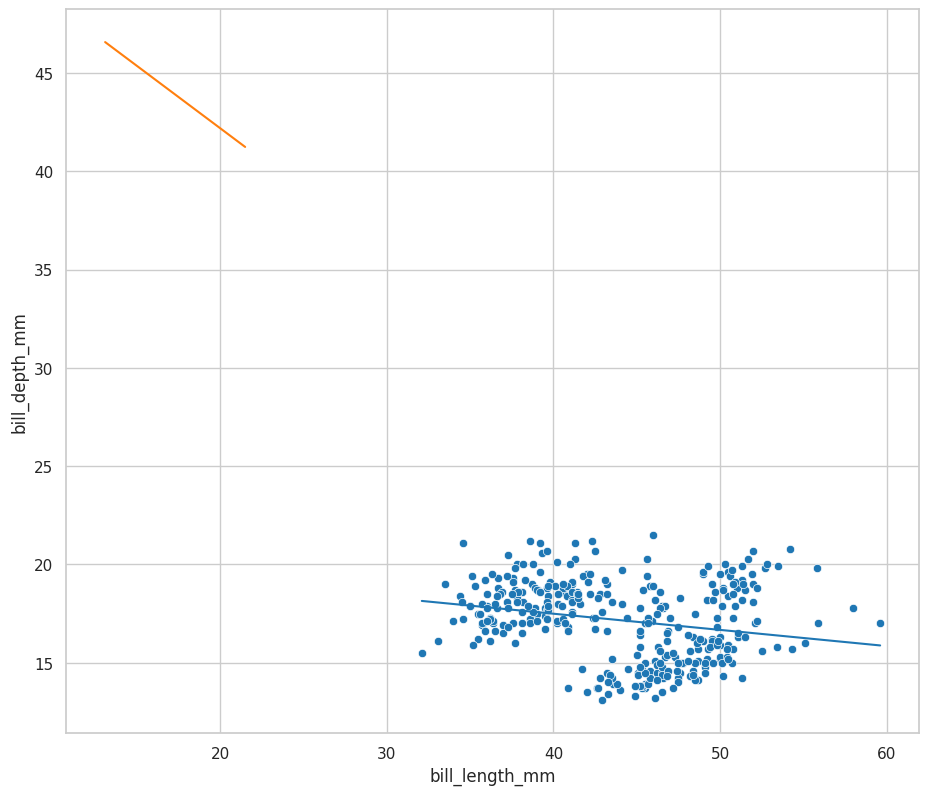

In [365]:
#graficando las dos intencidades enateriores en un solo plot
sns.scatterplot(
    x=x,
    y=y
) 

plt.plot(fx_1, fy_1)
plt.plot(fx_2, fy_2)

Las gráficas y líneas de regresión permiten visualizar la relación entre las variables 'bill_length_mm' y 'bill_depth_mm' del dataset de pingüinos. Además, al generar las gráficas invertidas de 'bill_depth_mm' vs. 'bill_length_mm', se puede analizar la relación en ambas direcciones. Las líneas de regresión proporcionan una estimación de la tendencia lineal de los datos y permiten evaluar la relación entre las variables.

## La regresión no nos dice nada sobre la causalidad, pero existe herramientas para seoarar las relaciones entre multiples variables

In [366]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data=preprossed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [367]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=preprossed_penguins_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

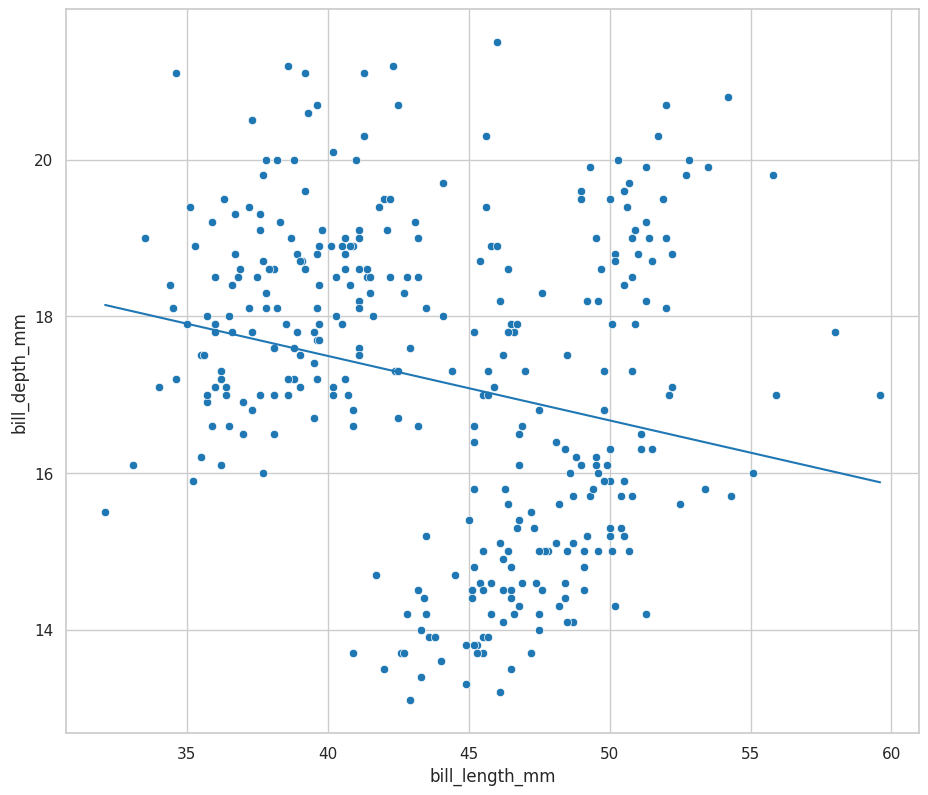

In [368]:
# Primero llamamos la funcion scatterplot de seaborn


sns.scatterplot(

    # Como sabemos ingresamos los datos y de ahi ya podemos mencionar que parte de los datos vamos a analizar
    
    data=preprossed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# Aqui creamos un array que indique donde inicia y termina los datos en X, en esta caso bill_length_mm


fx1 = np.array([preprossed_penguins_df.bill_length_mm.min(),
                preprossed_penguins_df.bill_length_mm.max()])

# Aqui representamos la funcion de la linea, donde es Y0 + MX, teniendo el intercept 
# como el valor que toma y en el primer valor de X y el slope actuadno como una pendiente.

fy1 = res_x_y.intercept + res_x_y.slope * fx1

plt.plot(fx1,fy1)

generando una gráfica de dispersión de los datos de 'bill_length_mm' y 'bill_depth_mm' del dataframe preprossed_penguins_df. Luego, traza una línea de regresión lineal utilizando los coeficientes de la regresión calculados previamente. Esto permite visualizar la tendencia lineal entre las dos variables y proporciona información sobre la relación entre ellas.

# Análisis de regresión múltiple

### Olvidé mi báscula para pesar los pinguinos, ¿cuál sería la mejor forma de capturar ese dato

### Creando modelos



### Modelo 1

In [369]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=preprossed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.54e-32
Time:                        17:37:55   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo 2

In [370]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=preprossed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           1.54e-32
Time:                        17:37:56   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo 3

In [371]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=preprossed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          9.26e-103
Time:                        17:37:56   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 4

In [372]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=preprossed_penguins_df
    )
    .fit()
)

model_4.summary()
#en este modelo estamos agregando una variable categorica los que nos 
#se podeia hacer en lo en el anterior modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          6.28e-122
Time:                        17:37:56   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo 5

In [373]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm',
        data=preprossed_penguins_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          3.13e-105
Time:                        17:37:56   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo OLS

In [374]:
import statsmodels.formula.api as smf

model = smf.ols('body_mass_g ~ bill_length_mm + bill_depth_mm + species', data=penguins).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     405.0
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          2.64e-127
Time:                        17:37:56   Log-Likelihood:                -2470.9
No. Observations:                 342   AIC:                             4952.
Df Residuals:                     337   BIC:                             4971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1742.7202 

- Cada modelo se ajusta utilizando el método de mínimos cuadrados ordinarios (OLS) y se genera un resumen que proporciona información sobre los coeficientes estimados, errores estándar, estadísticas de prueba, valores p, R-cuadrado ajustado y otros diagnósticos del ajuste del modelo.

- Estos modelos exploran diferentes combinaciones de variables para evaluar su capacidad para predecir la variable 'body_mass_g' en función de las características de los pingüinos. Se utilizan los resúmenes para examinar la significancia de los coeficientes y la calidad de ajuste de cada modelo.

# Visualizando resultados

### Creación de la tabla de resultados

In [375]:
models_resuls = pd.DataFrame(
    dict(
        actual_values=preprossed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=preprossed_penguins_df.species,
        sex=preprossed_penguins_df.sex
    )
)
models_resuls

actual_values  prediction_model_1  prediction_model_2  \
0           3750.0         3782.402961         3617.641192   
1           3800.0         3817.119665         3836.725580   
2           3250.0         3886.553073         3809.271371   
4           3450.0         3574.102738         3350.786581   
5           3650.0         3799.761313         3356.140070   
..             ...                 ...                 ...   
339         4000.0         5231.825347         4706.954140   
340         3400.0         4164.286703         4034.121055   
341         3775.0         4693.716437         4475.927353   
342         4100.0         4797.866549         4449.296758   
343         3775.0         4745.791493         4448.061337   

     prediction_model_3  prediction_model_4  prediction_model_5    species  \
0           3204.761227         3579.136946         3205.648453     Adelie   
1           3436.701722         3343.220772         3456.414782     Adelie   
2           3906.897032         3639.137335         3907.794176     Adelie   
4           3816.705772         3457.954243         3807.487644     Adelie   
5           3696.168128         3764.536023         3657.027846     Adelie   
..                  ...                 ...                 ...        ...   
339         4599.187485         4455.022405         4509.633367  Chinstrap   
340         4274.552753         3894.857519         4258.867037  Chinstrap   
341         3839.563668         4063.639819         3807.487644  Chinstrap   
342         4720.740455         4652.013882         4660.093165  Chinstrap   
343         4104.268240         3672.299099         4058.253974  Chinstrap   

        sex  
0      male  
1    female  
2    female  
4    female  
5      male  
..      ...  
339    male  
340  female  
341    male  
342    male  
343  female  

[333 rows x 8 columns]

### ECDFs

<AxesSubplot: ylabel='Proportion'>

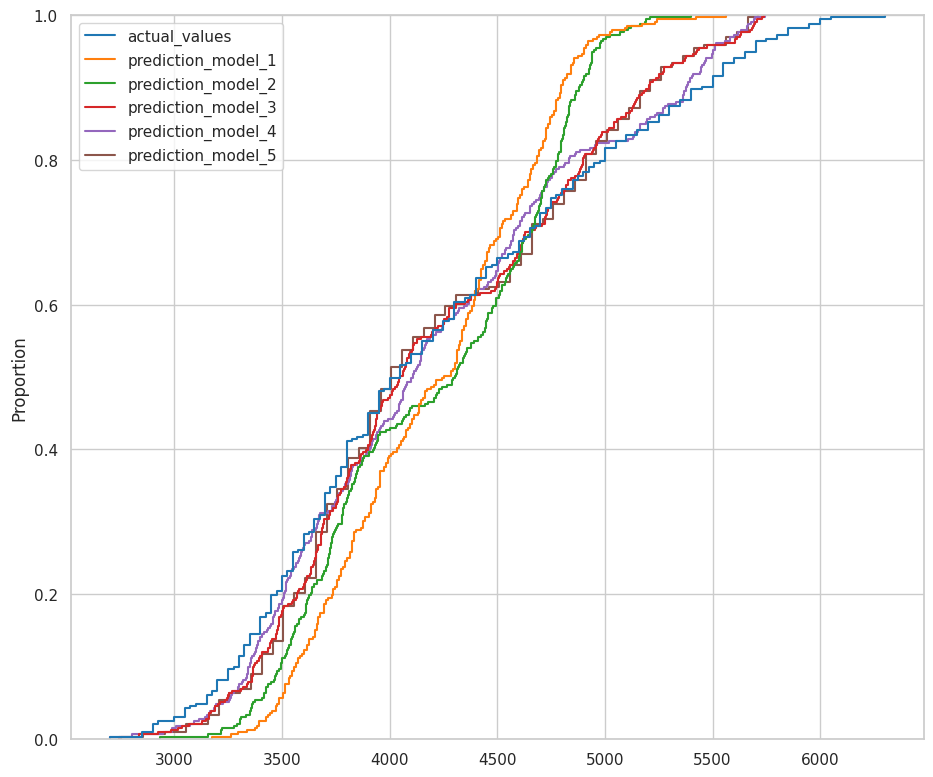

In [376]:
sns.ecdfplot(
    data=models_resuls

)

#### Gráfico ECDF (Empirical Cumulative Distribution Function):

- sns.ecdfplot(data=models_resuls): Esta gráfica muestra la función de distribución acumulada empírica para todas las variables en models_resuls. En el eje x se encuentran los valores y en el eje y se muestra la probabilidad acumulada de que los valores sean menores o iguales a un determinado valor. Esto permite observar cómo se distribuyen los valores reales y las predicciones en relación con su rango de variabilidad.

<AxesSubplot: ylabel='Proportion'>

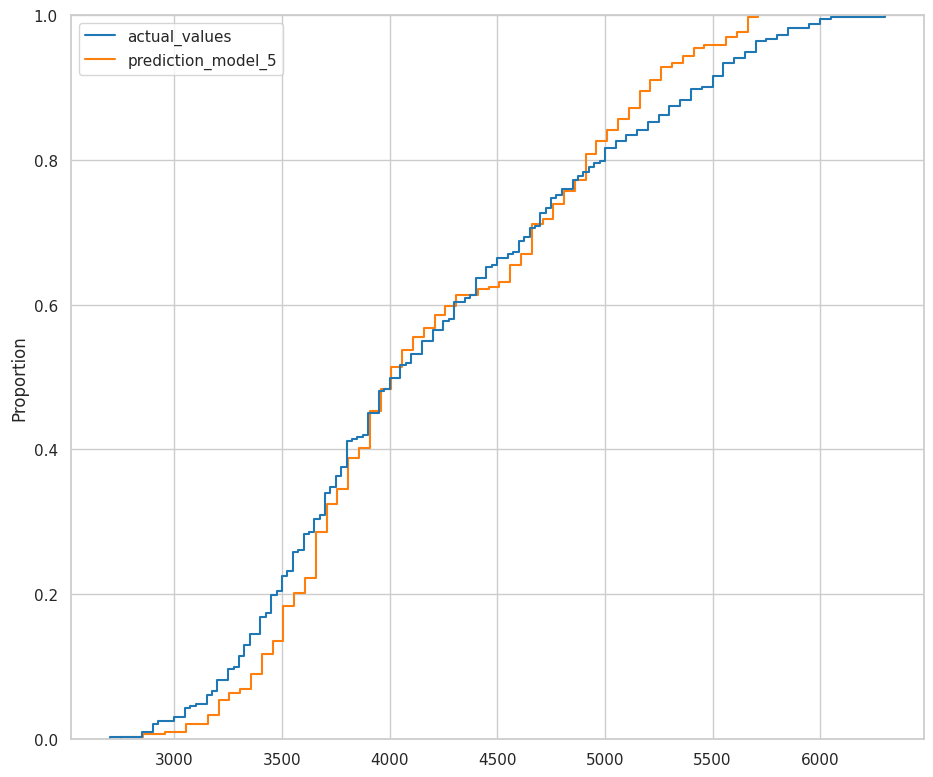

In [377]:
sns.ecdfplot(
    data=models_resuls.select_columns('actual_values', 'prediction_model_5')
)

### PDFs

In [378]:
sns.kdeplot(
    data=models_resuls
)#comparado los datos reales con nuetros modelos de prediccion 
#en forma de dencidad

<AxesSubplot: ylabel='Density'>

In [379]:
sns.kdeplot(
    data=models_resuls,
    cumulative=True
)

<AxesSubplot: ylabel='Density'>

### Gráfico ECDF y KDE para modelo 5:

- sns.ecdfplot(data=models_resuls.select_columns('actual_values', 'prediction_model_5')) y sns.kdeplot(data=models_resuls.select_columns('actual_values', 'prediction_model_5')): Estos gráficos se enfocan específicamente en comparar los valores reales y las predicciones generadas por el modelo 5. El gráfico ECDF muestra la función de distribución acumulada empírica para ambas variables, mientras que el gráfico KDE muestra la estimación de densidad de kernel para ambas variables.

In [380]:
sns.kdeplot(
    data=models_resuls.select_columns('actual_values', 'prediction_model_5')
)

<AxesSubplot: ylabel='Density'>

- Estas gráficas nos permiten visualizar la distribución de los valores reales y las predicciones generadas por los modelos de regresión lineal. Nos ayudan a entender cómo se ajustan los modelos a los datos y comparar las distribuciones de los valores reales y las predicciones para evaluar su similitud.

## ¿que pudieramos haber encontrado antes de hacer los modelos 

In [381]:
sns.lmplot(
    data=preprossed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

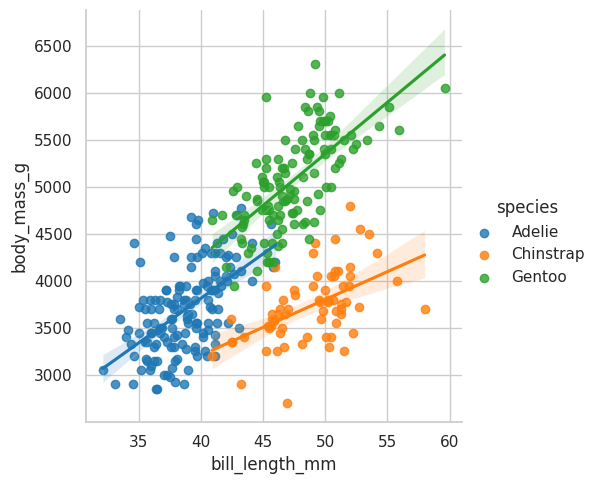

In [382]:
sns.lmplot(x='bill_length_mm', y='body_mass_g', hue='species', data=penguins)

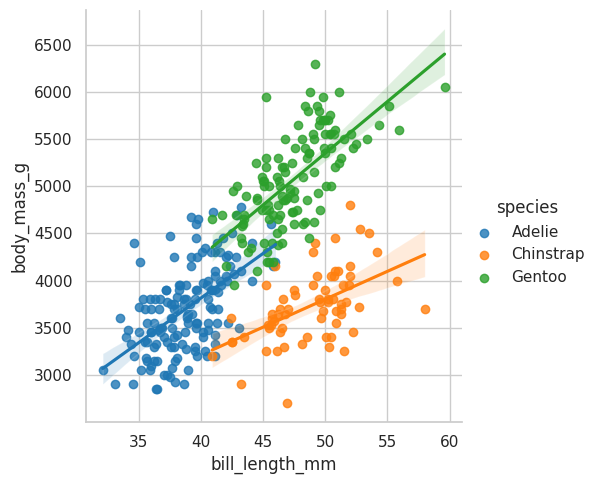

In [383]:
sns.lmplot(x='bill_length_mm', y='body_mass_g', hue='species', data=penguins)

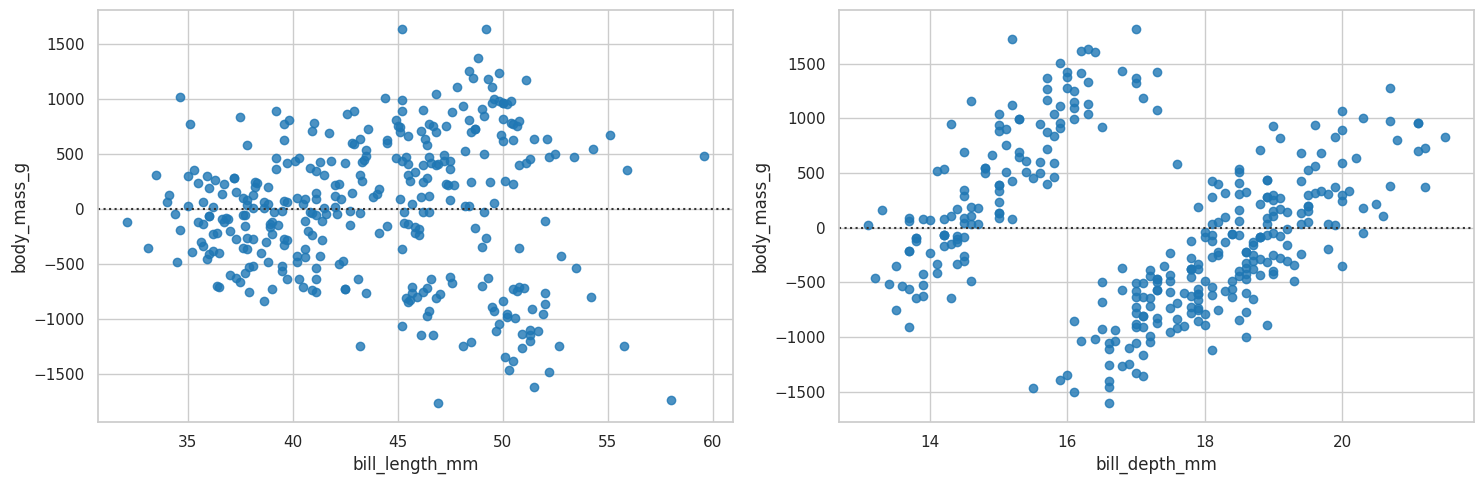

In [384]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.residplot(x='bill_length_mm', y='body_mass_g', data=penguins, ax=axs[0])
sns.residplot(x='bill_depth_mm', y='body_mass_g', data=penguins, ax=axs[1])


plt.tight_layout()

- En resumen, estas gráficas muestran diferentes análisis de regresión lineal entre variables del dataframe 'preprossed_penguins_df' y 'penguins'. Se exploran las relaciones entre las variables y se visualizan los residuos para evaluar la calidad del ajuste de la regresión.

# Análisis de regresión logística

### ¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o hembra

In [385]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=preprossed_penguins_df
).fit().summary()
#co este modelo estamos identificando si un pinguino es macho o hembra 
#donde los machos son 1 y las hembras 0 

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.4793
Time:                        17:39:18   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [386]:
preprocess_penguins_df.island.unique()
#en el modelo anterior podemos notar que no aparece una isla, la isla que no aparece es el punto de referencia
#en este caso es Biscoe

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [387]:
#para saber el valos de la isla biscoe debemos restar los valores de Dream y Torgesen
-1.55 - (-1.03)

-0.52

### Exploración de nuetras variables categóricas

In [388]:
(
    preprossed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

## ¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [389]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [390]:
preprossed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
#aca ya tenemos nuetros datos procesados y limpios 
preprossed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

In [391]:
preprossed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [392]:
preprossed_penguins_df = (
    preprossed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie_df', 'Gentoo_df', 'Chinstrap_df'], [1, 0, 0]))
)

In [393]:
print(preprossed_penguins_df['is_adelie'].isnull().sum())

0


In [394]:
print(preprossed_penguins_df['is_adelie'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Cargar los datos de los pingüinos
penguins = sns.load_dataset('penguins')

# Preprocesar los datos
penguins.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Convertir la variable objetivo 'sex' en una variable binaria
penguins['is_male'] = np.where(penguins['sex'] == 'Male', 1, 0)

# Crear una matriz de características (variables independientes)
X = penguins[['bill_length_mm', 'bill_depth_mm']]

# Agregar una constante para el intercepto del modelo
X = sm.add_constant(X)

# Variable objetivo (variable dependiente)
y = penguins['is_male']

# Crear y ajustar el modelo de regresión logística
model = sm.Logit(y, X).fit()

# Mostrar los resultados del modelo
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.485942
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_male   No. Observations:                  333
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.2989
Time:                        17:48:59   Log-Likelihood:                -161.82
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 1.096e-30
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -24.9444      2.891     -8.630      0.000     -30.610     -19.279
bill_length_mm   

Después, convertimos la variable objetivo 'sex' en una variable binaria 'is_male', donde 1 representa a los pingüinos machos y 0 a las hembras.

A continuación, creamos una matriz de características X con las variables independientes 'bill_length_mm' y 'bill_depth_mm'. Agregamos una constante a X para el término de intercepto del modelo.

Luego, creamos el vector objetivo y con la variable dependiente 'is_male'.

Finalmente, creamos el modelo de regresión logística utilizando sm.Logit(y, X).fit() y mostramos los resultados utilizando model.summary().

# Paradoja de simpson 

#### La paradoja de Simpson es un fenómeno en el que una tendencia o relación aparente entre dos variables en un nivel de agregación desaparece o incluso se invierte cuando se examinan los datos a un nivel más detallado. Esto puede ocurrir cuando las variables están relacionadas con una tercera variable confusa.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

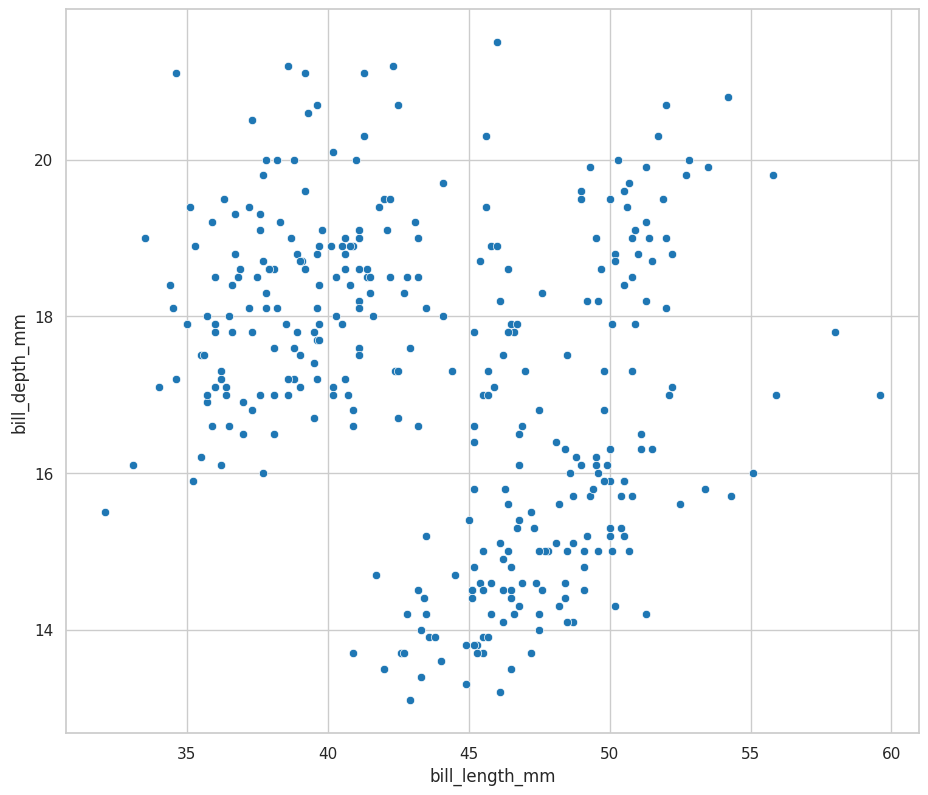

In [413]:
sns.scatterplot(
    data=preprossed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

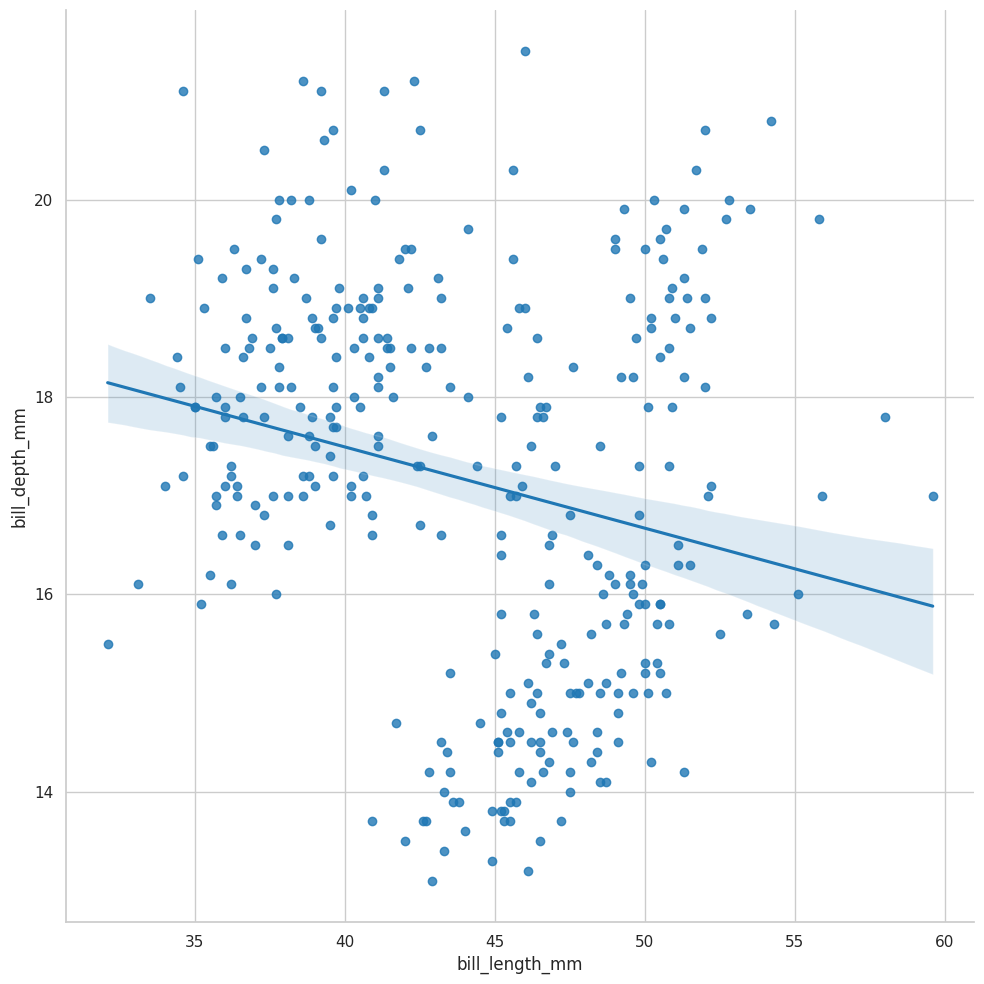

In [416]:
sns.lmplot(
    data=preprossed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    height=10
)

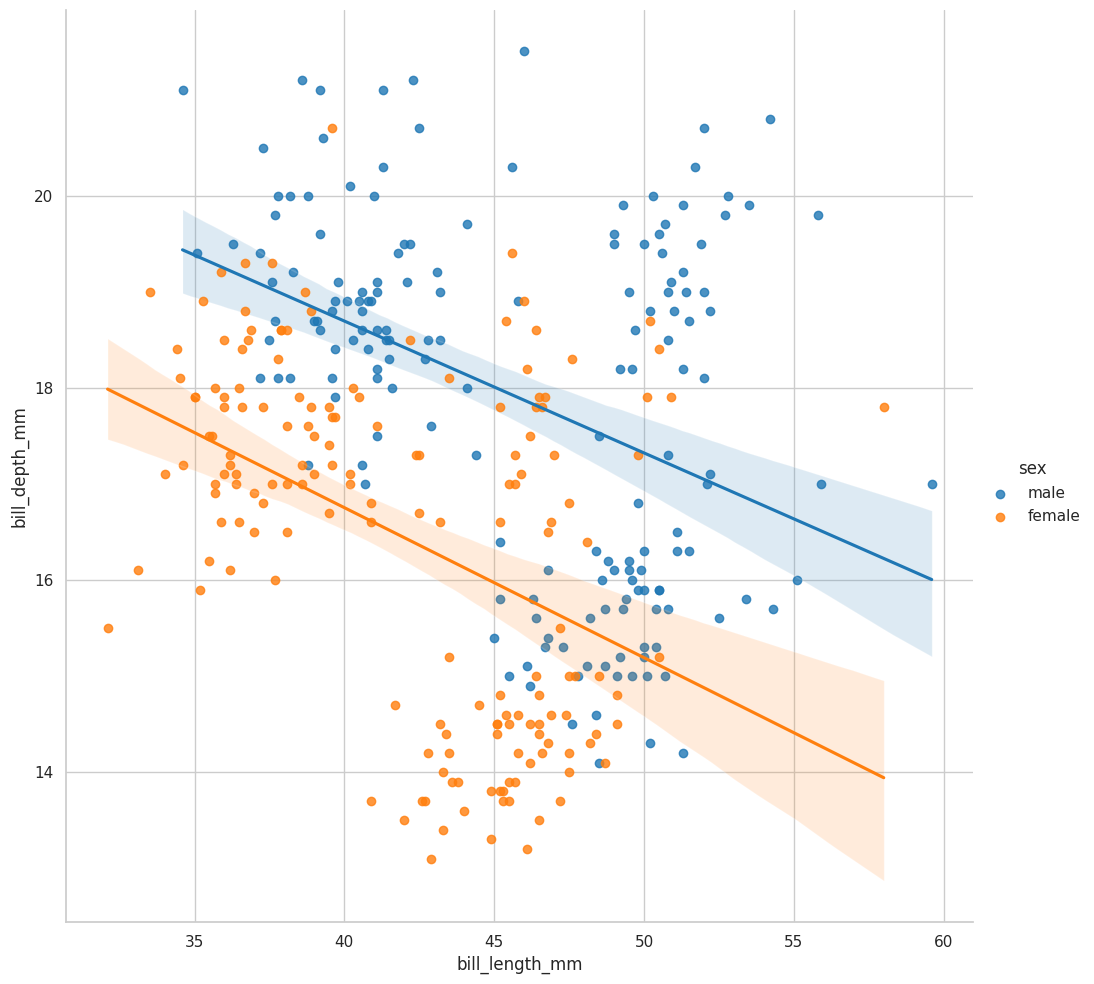

In [418]:
sns.lmplot(
    data=preprossed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue= 'sex',
    height=10
)

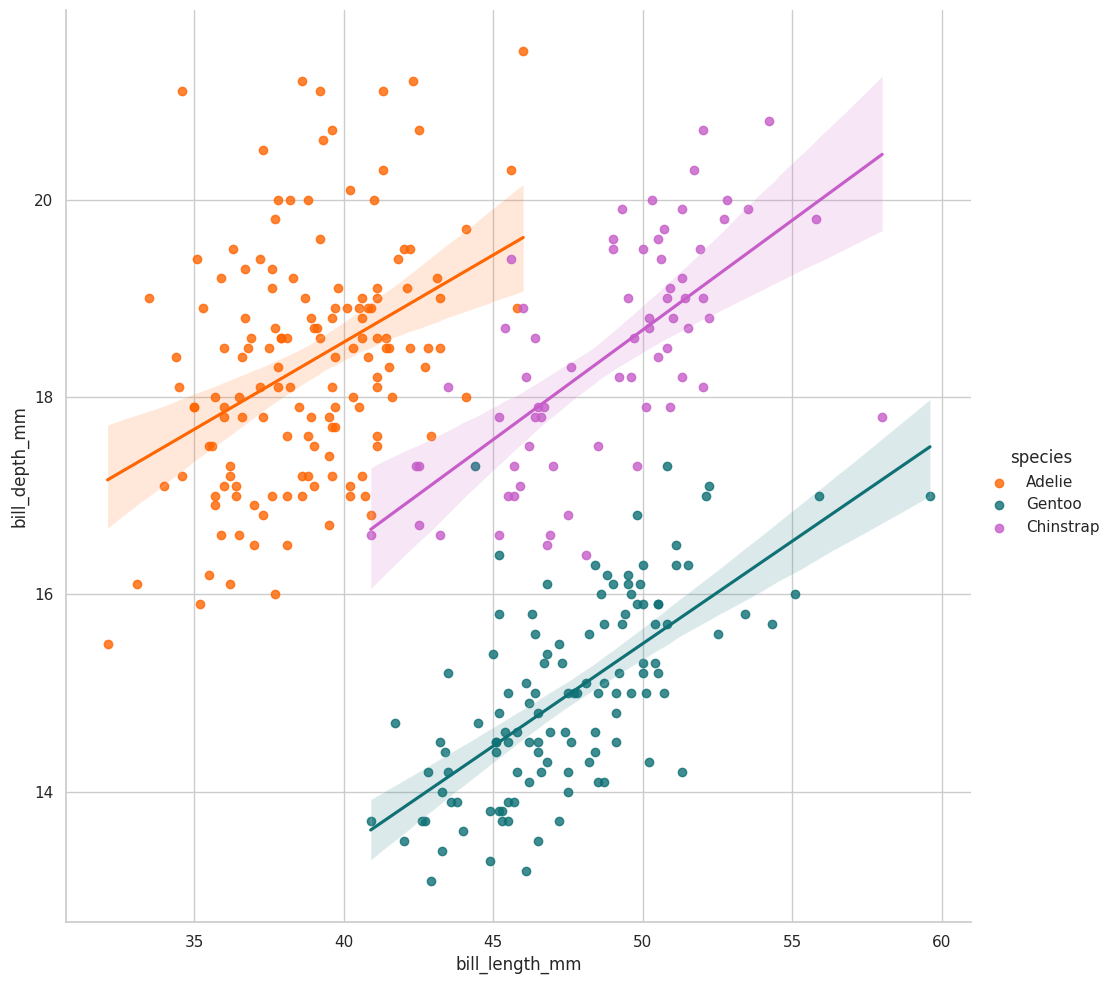

In [419]:
sns.lmplot(
    data=preprossed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue= 'species',
    height=10,
    palette=penguin_color
)

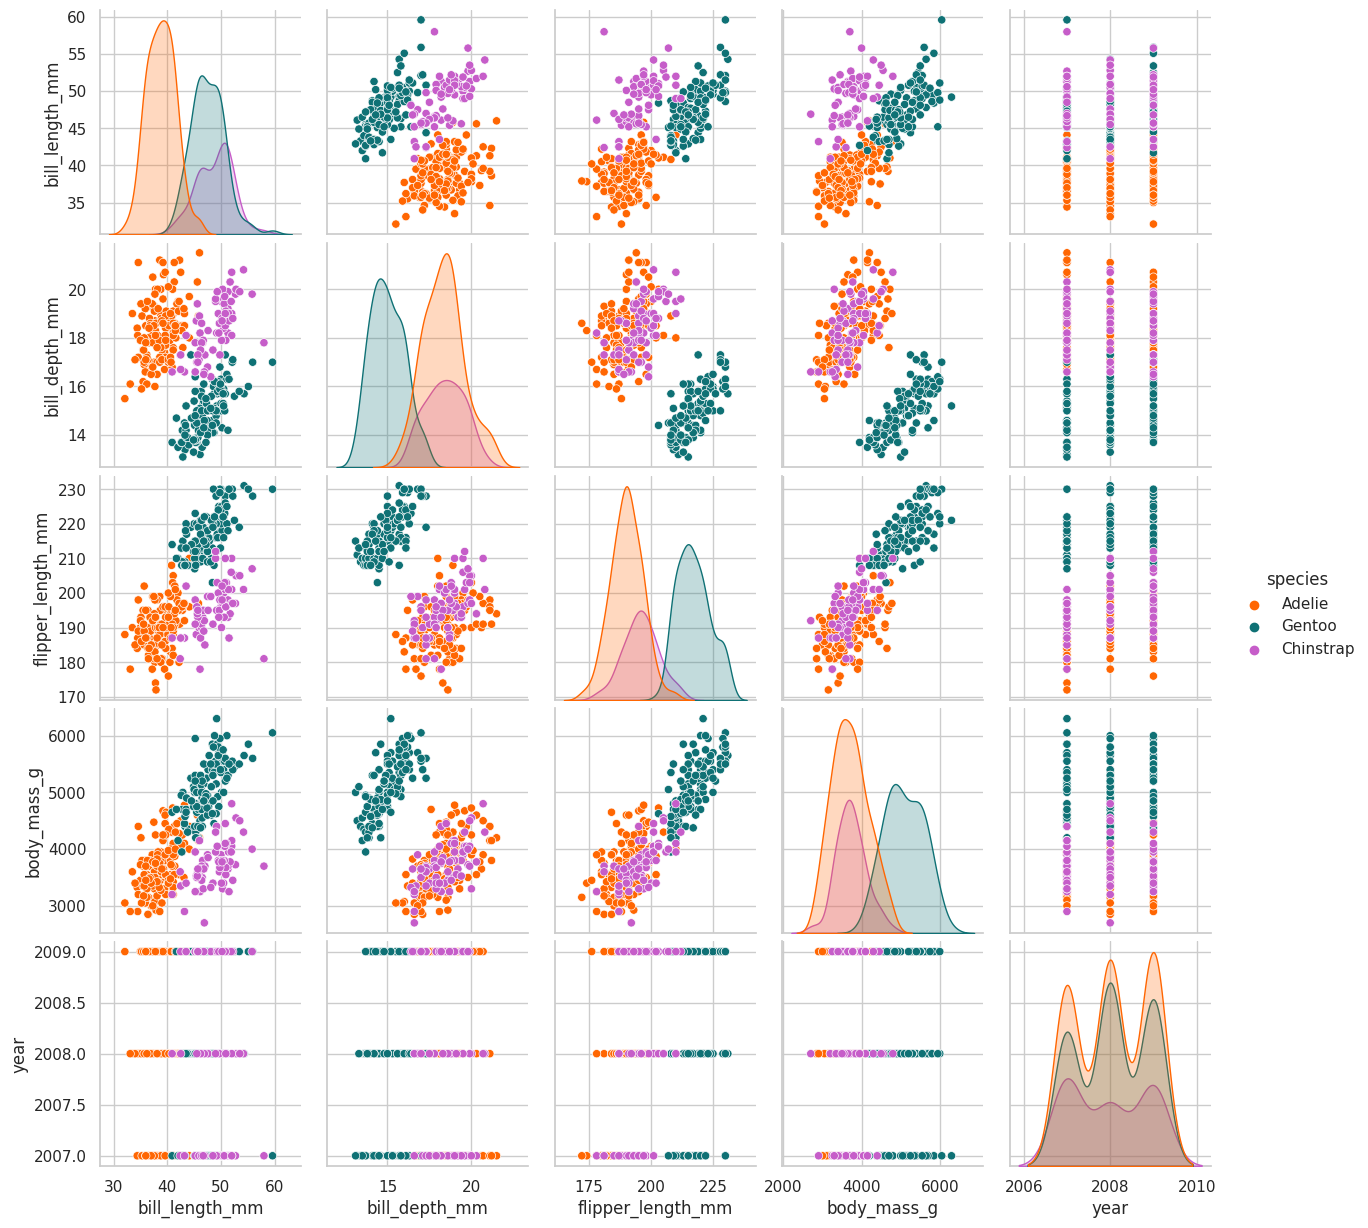

In [420]:
sns.pairplot(
    data=preprossed_penguins_df,
    hue='species',
    palette=penguin_color
)

In [410]:
import seaborn as sns

sns.pairplot(data=penguins, hue='species')

- Todas las variables en el conjunto de datos de pingüinos, dividido por especie. El argumento “hue” se utiliza para diferenciar cada especie con diferentes colores. Esto nos permite visualizar si hay diferencias entre las especies en términos de la relación entre las variables y si hay alguna

- paradoja de Simpson presente.
Por ejemplo, podemos observar que en la especie de pingüinos Adelia, hay una correlación positiva entre la longitud de la aleta y la longitud del pico, así como entre la longitud de la aleta y la masa corporal. Sin embargo, cuando combinamos todas las especies juntas, esta correlación se invierte y se vuelve negativa.

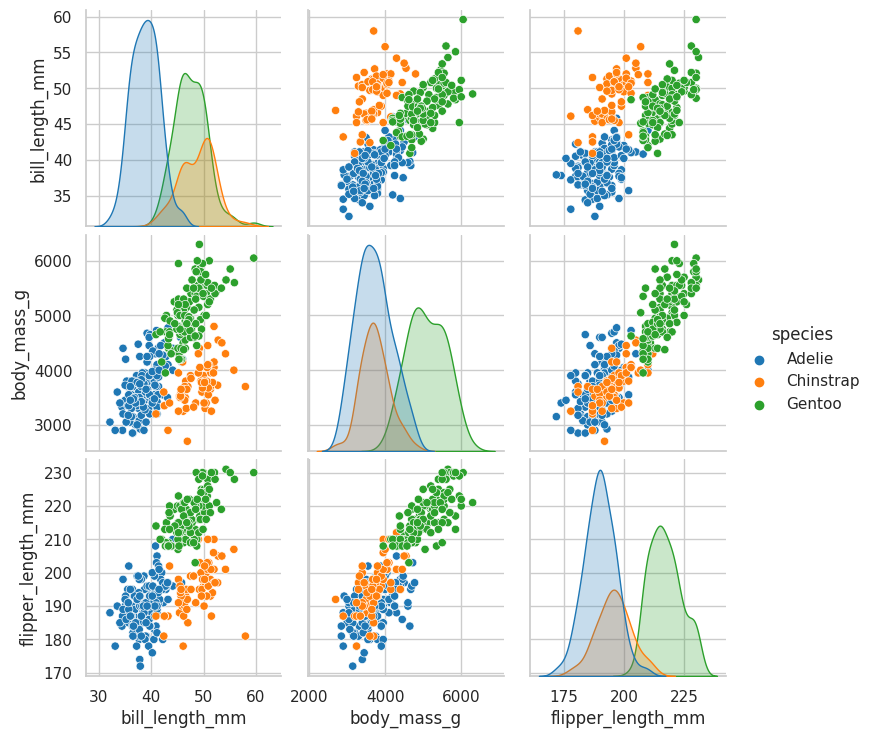

In [421]:
sns.pairplot(data=penguins, vars=['bill_length_mm', 'body_mass_g', 'flipper_length_mm'], hue='species')

- Este código crea un pairplot de las variables “bill_length_mm”, “body_mass_g” y “flipper_length_mm” para cada especie de pingüino. Podemos observar que en la especie Adelia, la longitud del pico y la masa corporal están positivamente correlacionadas con la longitud de la aleta. Sin embargo, cuando se combinan todas las especies juntas, la relación se invierte y se vuelve negativa.
****
- Esto ilustra la paradoja de Simpson, donde una tendencia positiva en cada grupo de datos se invierte cuando se combinan los grupos. En este caso, la variable de confusión podría ser la especie de pingüino, que afecta la relación entre las variables. Es importante tener en cuenta la paradoja de Simpson al analizar datos y asegurarse de que las relaciones observadas sean válidas para todo el conjunto de datos y no solo para subconjuntos específicos.

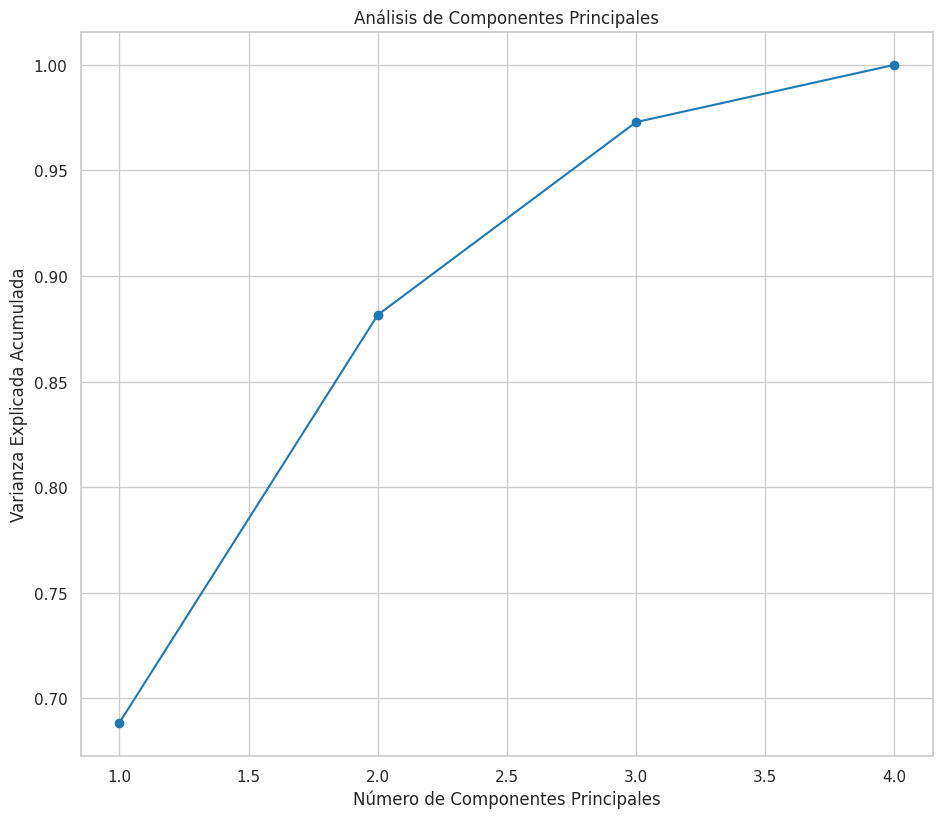

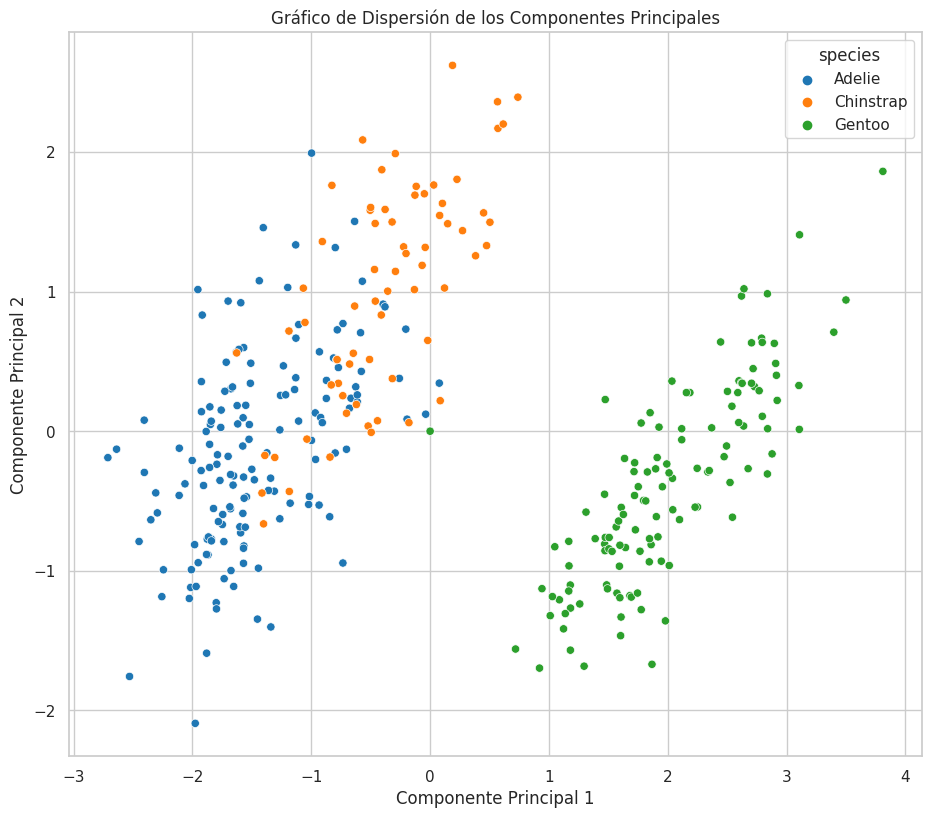

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar los datos de los pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionar las características numéricas para el PCA
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# Manejar los valores faltantes reemplazándolos con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Realizar la estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Crear el objeto PCA y ajustar los datos
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Componentes Principales')
plt.show()

# Graficar el gráfico de dispersión de los dos primeros componentes principales
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=penguins['species'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de Dispersión de los Componentes Principales')
plt.show()

## Texplica paso a paso lo que hace cada parte del código:
- Se seleccionan las características numéricas que se utilizarán para el PCA. En este caso, se eligen las columnas 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' y 'body_mass_g'. Estas características representan las dimensiones físicas de los pingüinos.

- Se utiliza el imputador SimpleImputer para manejar los valores faltantes en las características seleccionadas. En este caso, los valores faltantes se reemplazan con la media de cada columna.

- Los datos se estandarizan utilizando StandardScaler. Esto implica restar la media y dividir por la desviación estándar de cada característica. La estandarización es importante para asegurar que todas las características tengan la misma escala.

- Se crea un objeto PCA sin especificar el número de componentes principales a retener. Esto significa que se retendrán todos los componentes principales.

- Se ajusta el objeto PCA a los datos estandarizados utilizando pca.fit_transform(X_scaled). Esto calcula los componentes principales y transforma los datos originales en el espacio de los componentes principales.

- Se obtiene la varianza explicada por cada componente principal utilizando pca.explained_variance_ratio_. Esta propiedad retorna un arreglo con la proporción de varianza explicada por cada componente principal.

- Se grafica la varianza explicada acumulada en función del número de componentes principales. Esto permite visualizar cuánta varianza se explica a medida que se agregan más componentes principales. En el gráfico, cada punto representa el porcentaje acumulado de varianza explicada hasta ese punto.

- Se grafica un gráfico de dispersión de los dos primeros componentes principales. Esto muestra cómo se agrupan los datos en el espacio de los dos primeros componentes principales. Cada punto en el gráfico representa un pingüino, y los colores representan las diferentes especies de pingüinos.

- En resumen
El código realiza un análisis de componentes principales para reducir la dimensionalidad de los datos y visualizar la estructura de los pingüinos en un espacio de menor dimensión.

### Ejemplo con TNSE

/home/jhonfypy/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhonfypy/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


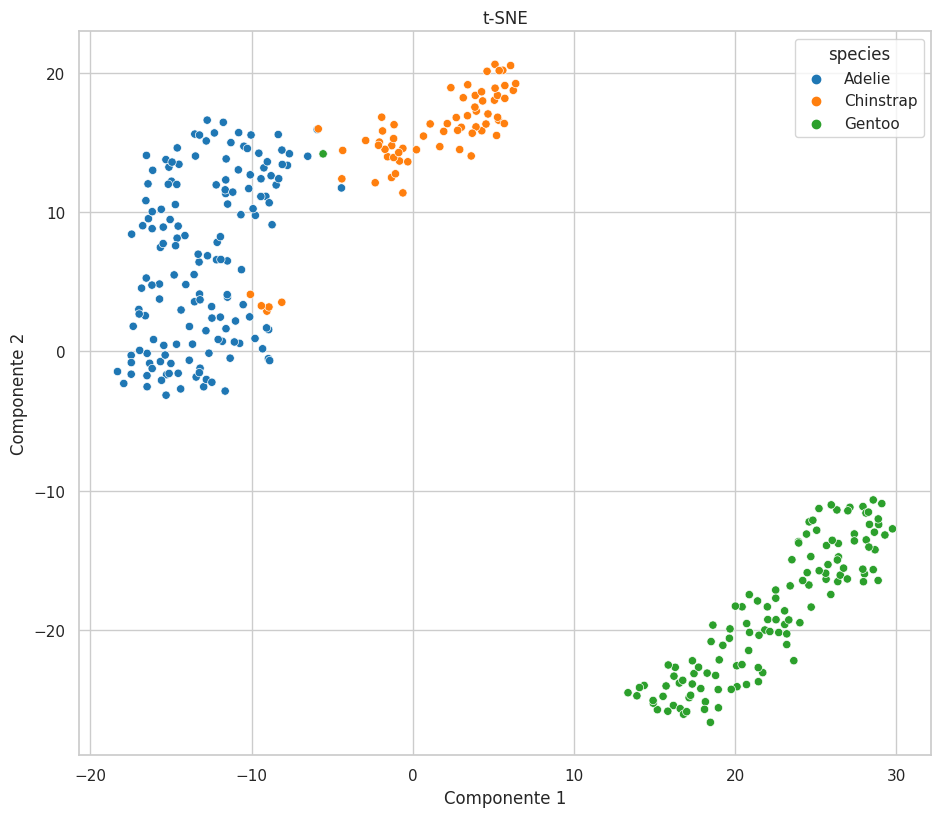

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar los datos de los pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionar las características numéricas para el t-SNE
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# Manejar los valores faltantes reemplazándolos con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Realizar la estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Crear el objeto t-SNE y ajustar los datos
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['Componente 1', 'Componente 2'])
tsne_df['species'] = penguins['species']

# Graficar el gráfico de dispersión de t-SNE
sns.scatterplot(x='Componente 1', y='Componente 2', hue='species', data=tsne_df)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('t-SNE')
plt.show()


## Ejemplo con UMAP

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

# Cargar los datos de los pingüinos
penguins = sns.load_dataset('penguins')

# Seleccionar las características numéricas para el UMAP
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]
X.fillna(X.mean(), inplace=True)

# Crear el objeto UMAP y ajustar los datos
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

# Graficar el gráfico de dispersión en 2D
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=penguins['species'])
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Projection of Penguins Data')
plt.show()


/tmp/ipykernel_559/3062504392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/tmp/ipykernel_559/3062504392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/tmp/ipykernel_559/3062504392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/